In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
indication_mapping = {'Melanoma':'KML', 
                      'Head & Neck Ca':'KHN',
                      'Other Head & Neck Ca':'KHN',
                      'NSCLC':'KLC',
                      'Other than SCLC':'KLC',
                      'Urothelial Ca':'KUC',
                      'RCC':'KRC'
                      }

#### Creating indication launch and patient count data for key competitiors.

In [3]:
df_mdv_indication = pd.read_csv("MDV_IndicationMaster.csv",encoding= 'unicode_escape',usecols=[1,2,4])
df_mdv_indication.columns = ['YM','Drug','Indication']
# df_mdv_indication['Indication'] = df_mdv_indication['Indication'].map(indication_mapping)
df_mdv_indication['Indication'] = df_mdv_indication['Indication'].replace(indication_mapping)
# df_mdv_indication['Indication'].fillna('Others',inplace=True)
df_mdv_indication.rename(columns={'YM':'Launch_month'},inplace=True)
df_mdv_indication = df_mdv_indication.sort_values(['Drug','Launch_month'])
df_mdv_indication = df_mdv_indication.drop_duplicates(['Drug','Indication'],keep='first')
df_mdv_indication = df_mdv_indication.reset_index(drop=True)
print(df_mdv_indication.shape)
df_mdv_indication

(104, 3)


Launch_month                           Drug  Indication
0          201401               Afatinib Maleate         KLC
1          201804                   Atezolizumab         KLC
2          201908                   Atezolizumab        SCLC
3          201909                   Atezolizumab   Breast Ca
4          202009                   Atezolizumab    Liver Ca
..            ...                            ...         ...
99         201603  Trametinib Dimethyl Sulfoxide         KML
100        201803  Trametinib Dimethyl Sulfoxide         KLC
101        201103                    Trastuzumab  Gastric Ca
102        201806                    Trastuzumab   Breast Ca
103        201309          Trastuzumab Emtansine   Breast Ca

[104 rows x 3 columns]

In [4]:
df_mdv_tumor = pd.read_csv("MDV_tumortype_data.csv",encoding= 'unicode_escape')
df_mdv_tumor.columns = ['YM','Drug','Indication','number_of_patients']
df_mdv_tumor['Indication'] = df_mdv_tumor['Indication'].replace(indication_mapping)
# df_mdv_tumor['Indication'].fillna('Others',inplace=True)
df_mdv_tumor = df_mdv_tumor.sort_values(['Drug','YM']).reset_index(drop=True)
df_mdv_tumor

YM                               Drug   Indication  \
0       201812                        Abemaciclib    Breast Ca   
1       201812                        Abemaciclib       Others   
2       201812                        Abemaciclib   Thyroid Ca   
3       201901                        Abemaciclib    Breast Ca   
4       201901                        Abemaciclib          KLC   
...        ...                                ...          ...   
111793  202002  Yttrium(90Y) Ibritumomab Tiuxetan  Non-Hodgkin   
111794  202003  Yttrium(90Y) Ibritumomab Tiuxetan    Breast Ca   
111795  202003  Yttrium(90Y) Ibritumomab Tiuxetan  Non-Hodgkin   
111796  202003  Yttrium(90Y) Ibritumomab Tiuxetan       Others   
111797  202004  Yttrium(90Y) Ibritumomab Tiuxetan       Others   

        number_of_patients  
0                       21  
1                       27  
2                        1  
3                       60  
4                        1  
...                    ...  
111793                   1  
111794                   1  
111795                   2  
111796                   1  
111797                   1  

[111798 rows x 4 columns]

In [5]:
df_patient_count_and_launch = df_mdv_indication.merge(df_mdv_tumor, on = ['Drug','Indication'],how='left')

In [6]:
df_patient_count_and_launch.isnull().sum()

Launch_month          0
Drug                  0
Indication            0
YM                    9
number_of_patients    9
dtype: int64

In [7]:
df_patient_count_and_launch = df_patient_count_and_launch[df_patient_count_and_launch['number_of_patients'].notnull()]
df_patient_count_and_launch['YM'] = df_patient_count_and_launch['YM'].astype(int)

In [8]:
df_patient_count_and_launch.nunique()

Launch_month            66
Drug                    30
Indication              28
YM                      56
number_of_patients    1013
dtype: int64

In [9]:
df_patient_count_and_launch

Launch_month                   Drug Indication      YM  \
0           201401       Afatinib Maleate        KLC  201604   
1           201401       Afatinib Maleate        KLC  201605   
2           201401       Afatinib Maleate        KLC  201606   
3           201401       Afatinib Maleate        KLC  201607   
4           201401       Afatinib Maleate        KLC  201608   
...            ...                    ...        ...     ...   
4962        201309  Trastuzumab Emtansine  Breast Ca  202007   
4963        201309  Trastuzumab Emtansine  Breast Ca  202008   
4964        201309  Trastuzumab Emtansine  Breast Ca  202009   
4965        201309  Trastuzumab Emtansine  Breast Ca  202010   
4966        201309  Trastuzumab Emtansine  Breast Ca  202011   

      number_of_patients  
0                  318.0  
1                  324.0  
2                  318.0  
3                  325.0  
4                  328.0  
...                  ...  
4962               185.0  
4963               178.0  
4964               183.0  
4965               179.0  
4966               178.0  

[4958 rows x 5 columns]

In [10]:
df_patient_count_and_launch['is_data_ok'] = np.where(df_patient_count_and_launch['YM']>= df_patient_count_and_launch['Launch_month'],1,0)

In [11]:
df_patient_count_and_launch

Launch_month                   Drug Indication      YM  \
0           201401       Afatinib Maleate        KLC  201604   
1           201401       Afatinib Maleate        KLC  201605   
2           201401       Afatinib Maleate        KLC  201606   
3           201401       Afatinib Maleate        KLC  201607   
4           201401       Afatinib Maleate        KLC  201608   
...            ...                    ...        ...     ...   
4962        201309  Trastuzumab Emtansine  Breast Ca  202007   
4963        201309  Trastuzumab Emtansine  Breast Ca  202008   
4964        201309  Trastuzumab Emtansine  Breast Ca  202009   
4965        201309  Trastuzumab Emtansine  Breast Ca  202010   
4966        201309  Trastuzumab Emtansine  Breast Ca  202011   

      number_of_patients  is_data_ok  
0                  318.0           1  
1                  324.0           1  
2                  318.0           1  
3                  325.0           1  
4                  328.0           1  
...                  ...         ...  
4962               185.0           1  
4963               178.0           1  
4964               183.0           1  
4965               179.0           1  
4966               178.0           1  

[4958 rows x 6 columns]

In [12]:
df_patient_count_and_launch['is_data_ok'].value_counts()

1    4505
0     453
Name: is_data_ok, dtype: int64

In [13]:
df_patient_count_and_launch[df_patient_count_and_launch['is_data_ok']==0]['Drug'].unique()

array(['Atezolizumab', 'Bevacizumab', 'Everolimus', 'Ipilimumab',
       'Nivolumab', 'Olaparib', 'Pembrolizumab', 'Ramucirumab',
       'Regorafenib Hydrate', 'Trastuzumab'], dtype=object)

In [14]:
filter_for_0_patients = (df_patient_count_and_launch['is_data_ok']==0) 
df_patient_count_and_launch.loc[filter_for_0_patients,'number_of_patients'] = 0
df_patient_count_and_launch.loc[filter_for_0_patients,'number_of_patients']

88      0.0
89      0.0
90      0.0
91      0.0
108     0.0
       ... 
4876    0.0
4877    0.0
4878    0.0
4879    0.0
4880    0.0
Name: number_of_patients, Length: 453, dtype: float64

In [15]:
df_patient_count_and_launch

Launch_month                   Drug Indication      YM  \
0           201401       Afatinib Maleate        KLC  201604   
1           201401       Afatinib Maleate        KLC  201605   
2           201401       Afatinib Maleate        KLC  201606   
3           201401       Afatinib Maleate        KLC  201607   
4           201401       Afatinib Maleate        KLC  201608   
...            ...                    ...        ...     ...   
4962        201309  Trastuzumab Emtansine  Breast Ca  202007   
4963        201309  Trastuzumab Emtansine  Breast Ca  202008   
4964        201309  Trastuzumab Emtansine  Breast Ca  202009   
4965        201309  Trastuzumab Emtansine  Breast Ca  202010   
4966        201309  Trastuzumab Emtansine  Breast Ca  202011   

      number_of_patients  is_data_ok  
0                  318.0           1  
1                  324.0           1  
2                  318.0           1  
3                  325.0           1  
4                  328.0           1  
...                  ...         ...  
4962               185.0           1  
4963               178.0           1  
4964               183.0           1  
4965               179.0           1  
4966               178.0           1  

[4958 rows x 6 columns]

In [16]:
df_patient_count_and_launch['Indication'].unique()

array(['KLC', 'SCLC', 'Breast Ca', 'Liver Ca', 'Others', 'KRC', 'CRC',
       'Glioma', 'Ovarian Ca', 'Cervical Ca', 'KHN', 'KML', 'Gastric Ca',
       'Esophageal Ca', 'Endmetarial Ca', 'Prostate',
       'Pancreatic Neuroendocrine Tumors', 'Vascular lipoma',
       'Subepedymal giant cell astrocytoma', 'Pancreatic Ca',
       'Thyroid Ca', 'Hodgkin', 'Malignant pleural mesothelioma',
       'CRC MSI-H', 'Liposarcoma', 'KUC', 'MSI-H',
       'Gastrointestinal stromal tumor'], dtype=object)

In [17]:
filter_for_specific_indications = (df_patient_count_and_launch['Indication']!='KLC') & \
                        (df_patient_count_and_launch['Indication']!='KRC') & \
                        (df_patient_count_and_launch['Indication']!='KHN') & \
                        (df_patient_count_and_launch['Indication']!='KML') & \
                        (df_patient_count_and_launch['Indication']!='KUC')
df_patient_count_and_launch.loc[filter_for_specific_indications,'Indication'] = 'Others'
df_patient_count_and_launch.loc[filter_for_specific_indications,'Indication']

88      Others
89      Others
90      Others
91      Others
92      Others
         ...  
4962    Others
4963    Others
4964    Others
4965    Others
4966    Others
Name: Indication, Length: 2980, dtype: object

In [18]:
df_patient_count_and_launch

Launch_month                   Drug Indication      YM  \
0           201401       Afatinib Maleate        KLC  201604   
1           201401       Afatinib Maleate        KLC  201605   
2           201401       Afatinib Maleate        KLC  201606   
3           201401       Afatinib Maleate        KLC  201607   
4           201401       Afatinib Maleate        KLC  201608   
...            ...                    ...        ...     ...   
4962        201309  Trastuzumab Emtansine     Others  202007   
4963        201309  Trastuzumab Emtansine     Others  202008   
4964        201309  Trastuzumab Emtansine     Others  202009   
4965        201309  Trastuzumab Emtansine     Others  202010   
4966        201309  Trastuzumab Emtansine     Others  202011   

      number_of_patients  is_data_ok  
0                  318.0           1  
1                  324.0           1  
2                  318.0           1  
3                  325.0           1  
4                  328.0           1  
...                  ...         ...  
4962               185.0           1  
4963               178.0           1  
4964               183.0           1  
4965               179.0           1  
4966               178.0           1  

[4958 rows x 6 columns]

In [19]:
df_patient_count_and_launch.Indication.unique()

array(['KLC', 'Others', 'KRC', 'KHN', 'KML', 'KUC'], dtype=object)

In [20]:
df_patient_count_and_launch = df_patient_count_and_launch.groupby(['Drug','Indication','YM']).agg({'number_of_patients':'sum','Launch_month':'min'}).reset_index()

In [21]:
df_patient_count_and_launch.nunique()

Drug                   30
Indication              6
YM                     56
number_of_patients    923
Launch_month           49
dtype: int64

In [22]:
df_patient_count_and_launch['Drug_Indication'] = df_patient_count_and_launch['Drug'].astype(str) + '_' + \
                                                 df_patient_count_and_launch['Indication'].astype(str)
df_patient_count_and_launch

Drug Indication      YM  number_of_patients  \
0          Afatinib Maleate        KLC  201604               318.0   
1          Afatinib Maleate        KLC  201605               324.0   
2          Afatinib Maleate        KLC  201606               318.0   
3          Afatinib Maleate        KLC  201607               325.0   
4          Afatinib Maleate        KLC  201608               328.0   
...                     ...        ...     ...                 ...   
2747  Trastuzumab Emtansine     Others  202007               185.0   
2748  Trastuzumab Emtansine     Others  202008               178.0   
2749  Trastuzumab Emtansine     Others  202009               183.0   
2750  Trastuzumab Emtansine     Others  202010               179.0   
2751  Trastuzumab Emtansine     Others  202011               178.0   

      Launch_month               Drug_Indication  
0           201401          Afatinib Maleate_KLC  
1           201401          Afatinib Maleate_KLC  
2           201401          Afatinib Maleate_KLC  
3           201401          Afatinib Maleate_KLC  
4           201401          Afatinib Maleate_KLC  
...            ...                           ...  
2747        201309  Trastuzumab Emtansine_Others  
2748        201309  Trastuzumab Emtansine_Others  
2749        201309  Trastuzumab Emtansine_Others  
2750        201309  Trastuzumab Emtansine_Others  
2751        201309  Trastuzumab Emtansine_Others  

[2752 rows x 6 columns]

In [23]:
df_monthly_patient_count_competitors = df_patient_count_and_launch.pivot(index='YM',columns='Drug_Indication',values='number_of_patients').reset_index()

In [24]:
df_monthly_patient_count_competitors

Drug_Indication      YM  Afatinib Maleate_KLC  Atezolizumab_KLC  \
0                201604                 318.0               NaN   
1                201605                 324.0               NaN   
2                201606                 318.0               NaN   
3                201607                 325.0               NaN   
4                201608                 328.0               NaN   
5                201609                 324.0               NaN   
6                201610                 328.0               NaN   
7                201611                 339.0               NaN   
8                201612                 350.0               NaN   
9                201701                 358.0               NaN   
10               201702                 354.0               NaN   
11               201703                 377.0               NaN   
12               201704                 372.0               NaN   
13               201705                 383.0               NaN   
14               201706                 399.0               NaN   
15               201707                 405.0               NaN   
16               201708                 424.0               NaN   
17               201709                 414.0               NaN   
18               201710                 438.0               NaN   
19               201711                 434.0               NaN   
20               201712                 436.0               NaN   
21               201801                 429.0               NaN   
22               201802                 431.0               NaN   
23               201803                 443.0               NaN   
24               201804                 456.0              10.0   
25               201805                 464.0              69.0   
26               201806                 467.0             122.0   
27               201807                 481.0             161.0   
28               201808                 480.0             181.0   
29               201809                 431.0             200.0   
30               201810                 448.0             208.0   
31               201811                 414.0             206.0   
32               201812                 402.0             203.0   
33               201901                 369.0             234.0   
34               201902                 348.0             256.0   
35               201903                 323.0             259.0   
36               201904                 337.0             270.0   
37               201905                 326.0             293.0   
38               201906                 305.0             291.0   
39               201907                 298.0             310.0   
40               201908                 290.0             295.0   
41               201909                 270.0             302.0   
42               201910                 281.0             318.0   
43               201911                 260.0             326.0   
44               201912                 271.0             345.0   
45               202001                 274.0             357.0   
46               202002                 242.0             353.0   
47               202003                 257.0             392.0   
48               202004                 262.0             399.0   
49               202005                 221.0             380.0   
50               202006                 247.0             391.0   
51               202007                 259.0             403.0   
52               202008                 242.0             411.0   
53               202009                 243.0             414.0   
54               202010                 240.0             412.0   
55               202011                 235.0             406.0   

Drug_Indication  Atezolizumab_Others  Avelumab_KRC  Avelumab_Others  \
0                                NaN           NaN              NaN   
1                                NaN  

In [25]:
df_monthly_patient_count_competitors.columns

Index(['YM', 'Afatinib Maleate_KLC', 'Atezolizumab_KLC', 'Atezolizumab_Others',
       'Avelumab_KRC', 'Avelumab_Others', 'Axitinib_KRC', 'Bevacizumab_KLC',
       'Bevacizumab_Others', 'Cabozantinib Malate_KRC', 'Cetuximab_KHN',
       'Cetuximab_Others', 'Dabrafenib Mesilate_KLC',
       'Dabrafenib Mesilate_KML', 'Dacomitinib Hydrate_KLC', 'Docetaxel_KHN',
       'Docetaxel_KLC', 'Docetaxel_Others', 'Erlotinib Hydrochloride_KLC',
       'Everolimus_KRC', 'Everolimus_Others', 'Gefitinib_KLC',
       'Ipilimumab_KLC', 'Ipilimumab_KML', 'Ipilimumab_KRC',
       'Lenvatinib Mesilate_Others', 'Nivolumab_KHN', 'Nivolumab_KLC',
       'Nivolumab_KML', 'Nivolumab_KRC', 'Nivolumab_Others', 'Olaparib_Others',
       'Osimertinib Mesilate_KLC', 'Oxaliplatin_Others', 'Paclitaxel_KHN',
       'Paclitaxel_KLC', 'Paclitaxel_Others', 'Pazopanib Hydrochloride_KRC',
       'Pazopanib Hydrochloride_Others', 'Pembrolizumab_KHN',
       'Pembrolizumab_KLC', 'Pembrolizumab_KML', 'Pembrolizumab_KRC',
    

In [26]:
df_monthly_patient_count_competitors = df_monthly_patient_count_competitors[[col for col in df_monthly_patient_count_competitors.columns if 'pembro' not in col.lower()]+[col for col in df_monthly_patient_count_competitors.columns if 'pembro' in col.lower() ]]

In [27]:
print(df_monthly_patient_count_competitors.shape)
df1 = df_monthly_patient_count_competitors.copy()
corr_matrix = df1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
high_cor = [column for column in upper.columns if (any(upper[column] > 0.9) or any(upper[column] < -0.9))]
print(len(high_cor))
print(high_cor)

(56, 58)
34
['Atezolizumab_KLC', 'Avelumab_KRC', 'Avelumab_Others', 'Bevacizumab_KLC', 'Bevacizumab_Others', 'Cabozantinib Malate_KRC', 'Cetuximab_Others', 'Erlotinib Hydrochloride_KLC', 'Gefitinib_KLC', 'Ipilimumab_KRC', 'Lenvatinib Mesilate_Others', 'Nivolumab_KHN', 'Nivolumab_KLC', 'Nivolumab_KRC', 'Nivolumab_Others', 'Olaparib_Others', 'Osimertinib Mesilate_KLC', 'Oxaliplatin_Others', 'Paclitaxel_KHN', 'Pazopanib Hydrochloride_KRC', 'Ramucirumab_KLC', 'Ramucirumab_Others', 'Sorafenib Tosilate_Others', 'Sunitinib Malate_KRC', 'Trametinib Dimethyl Sulfoxide_KLC', 'Trametinib Dimethyl Sulfoxide_KML', 'Trastuzumab Emtansine_Others', 'Trastuzumab_Others', 'Pembrolizumab_KHN', 'Pembrolizumab_KLC', 'Pembrolizumab_KML', 'Pembrolizumab_KRC', 'Pembrolizumab_KUC', 'Pembrolizumab_Others']


<AxesSubplot:xlabel='Drug_Indication', ylabel='Drug_Indication'>

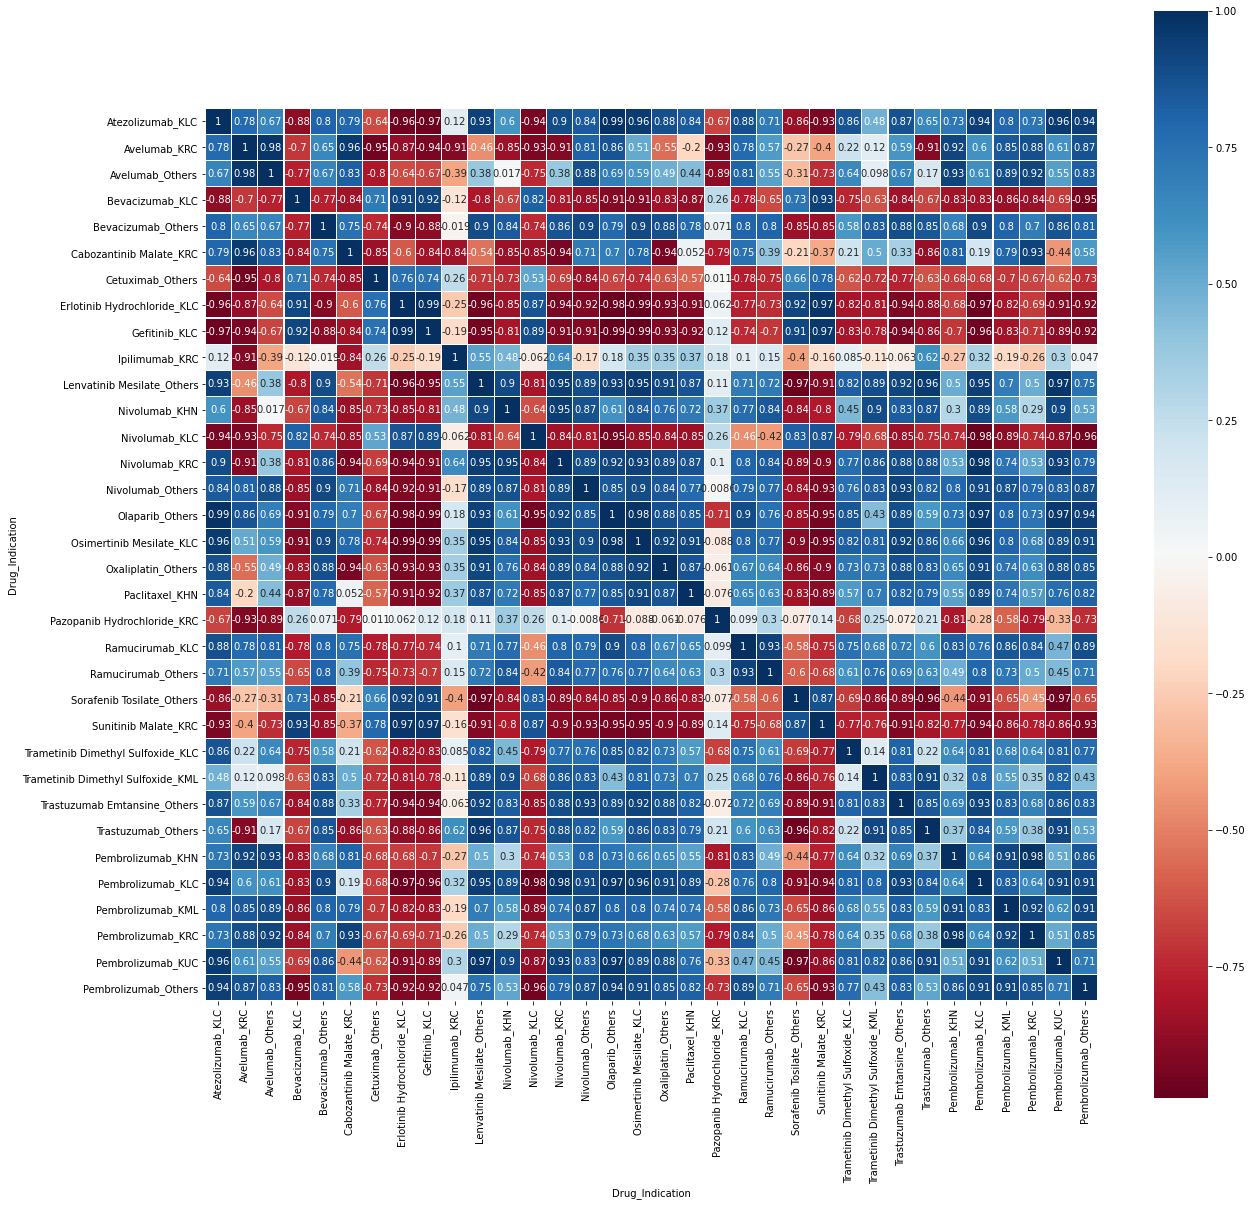

In [28]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
sns.heatmap(df_monthly_patient_count_competitors[high_cor].corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [29]:
df_monthly_patient_count_keytruda = df_monthly_patient_count_competitors[['YM']+[col for col in df_monthly_patient_count_competitors.columns if 'pembro' in col.lower()]]

In [30]:
df_monthly_patient_count_keytruda['total_patients'] = df_monthly_patient_count_keytruda.iloc[:,1:].sum(axis = 1, skipna = True)
df_monthly_patient_count_keytruda

Drug_Indication      YM  Pembrolizumab_KHN  Pembrolizumab_KLC  \
0                201604                NaN                NaN   
1                201605                NaN                NaN   
2                201606                NaN                NaN   
3                201607                NaN                NaN   
4                201608                NaN                NaN   
5                201609                NaN                NaN   
6                201610                NaN                NaN   
7                201611                NaN                NaN   
8                201612                NaN                NaN   
9                201701                NaN                NaN   
10               201702                NaN                2.0   
11               201703                NaN               71.0   
12               201704                0.0              160.0   
13               201705                0.0              227.0   
14               201706                0.0              290.0   
15               201707                0.0              341.0   
16               201708                0.0              378.0   
17               201709                0.0              393.0   
18               201710                0.0              430.0   
19               201711                0.0              426.0   
20               201712                0.0              427.0   
21               201801                0.0              475.0   
22               201802                0.0              500.0   
23               201803                0.0              516.0   
24               201804                0.0              557.0   
25               201805                0.0              591.0   
26               201806                0.0              599.0   
27               201807                0.0              610.0   
28               201808                0.0              654.0   
29               201809                0.0              636.0   
30               201810                0.0              654.0   
31               201811                0.0              685.0   
32               201812                0.0              676.0   
33               201901                0.0              775.0   
34               201902                0.0              838.0   
35               201903                0.0              913.0   
36               201904                0.0              965.0   
37               201905                0.0             1021.0   
38               201906                0.0             1033.0   
39               201907                0.0             1095.0   
40               201908                0.0             1082.0   
41               201909                0.0             1086.0   
42               201910                0.0             1125.0   
43               201911                0.0             1131.0   
44               201912               13.0             1131.0   
45               202001               22.0             1185.0   
46               202002               37.0             1163.0   
47               202003               47.0             1177.0   
48               202004               61.0             1158.0   
49               202005               70.0             1173.0   
50               202006               89.0             1208.0   
51               202007               79.0             1230.0   
52               202008               84.0             1200.0   
53               202009               88.0             1216.0   
54               202010               96.0             1240.0   
55               202011               97.0             1181.0   

Drug_Indication  Pembrolizumab_KML  Pembrolizumab_KRC  Pembrolizumab_KUC  \
0                              NaN                NaN                NaN   
1                              NaN                NaN                NaN   
2                              NaN                NaN             

In [31]:
# df_patient_count_and_launch.to_csv('indication_launch+patients_info.csv',index=False)

#### Creating sales data (keytruda + competitors for target accounts)

In [32]:
df_inhouse_sales = pd.read_excel("S001_Inhouse_Sales_YMD_from_Launch.xlsx",sheet_name='Sheet2')
df_inhouse_sales.drop(columns=['HP_GP_TYPE','Ins_Type','Prod_abbr','Ins_DCF_Code','PROD_FAM_CODE'],inplace=True)
df_inhouse_sales.sort_values(['PROD_NAME_ENG','YM'],inplace = True)
df_inhouse_sales = df_inhouse_sales.reset_index(drop=True)
print(df_inhouse_sales.shape)

df_inhouse_sales_by_account = df_inhouse_sales.groupby(['Ins_Code','PROD_NAME_ENG','YM']).agg({'NHI National Health Insurance (JPY)':'sum',
                                                                 'QTY':'sum'}).reset_index()

(546428, 8)


In [33]:
df_inhouse_sales_by_account_trget = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'].groupby('Ins_Code').agg({'NHI National Health Insurance (JPY)':'sum'}).reset_index()
df_inhouse_sales_by_account_trget

Ins_Code  NHI National Health Insurance (JPY)
0      1000001                         4.223230e+08
1      1000011                         1.126512e+08
2      1000021                         1.146593e+09
3      1000031                         2.108046e+08
4      1000040                         3.143635e+08
...        ...                                  ...
1352   2024478                         2.932496e+07
1353   2024527                         5.523438e+06
1354   2024650                         1.250101e+07
1355   2026683                         2.908260e+07
1356   2027022                         1.841532e+07

[1357 rows x 2 columns]

In [34]:
df_inhouse_sales_by_YM = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'].groupby('YM').agg({'NHI National Health Insurance (JPY)':'sum','QTY':'sum'}).reset_index()
df_inhouse_sales_by_YM

YM  NHI National Health Insurance (JPY)      QTY
0   201702                         4.701825e+07    114.4
1   201703                         6.345510e+08   1545.6
2   201704                         1.514960e+09   3689.0
3   201705                         2.109301e+09   5137.2
4   201706                         2.740174e+09   6673.4
5   201707                         3.092276e+09   7530.2
6   201708                         3.700607e+09   9012.4
7   201709                         3.521340e+09   8574.8
8   201710                         4.197920e+09  10222.8
9   201711                         4.394170e+09  10701.0
10  201712                         4.686511e+09  11411.4
11  201801                         4.686197e+09  11413.2
12  201802                         5.385852e+09  13116.4
13  201803                         5.428329e+09  13220.2
14  201804                         6.501790e+09  17826.2
15  201805                         6.294440e+09  17258.8
16  201806                         6.468792e+09  17739.2
17  201807                         6.615705e+09  18142.0
18  201808                         7.384187e+09  20250.0
19  201809                         6.273144e+09  17201.8
20  201810                         7.760682e+09  21283.2
21  201811                         7.521468e+09  20625.2
22  201812                         7.786373e+09  21355.6
23  201901                         8.290029e+09  22735.4
24  201902                         8.447986e+09  23170.6
25  201903                         8.145908e+09  22342.0
26  201904                         1.142012e+10  31322.6
27  201905                         9.782138e+09  26829.6
28  201906                         1.040667e+10  28542.6
29  201907                         1.136752e+10  31178.0
30  201908                         1.206721e+10  33097.0
31  201909                         1.387860e+10  38065.0
32  201910                         1.072167e+10  28872.0
33  201911                         1.116612e+10  30069.0
34  201912                         1.264073e+10  34040.0
35  202001                         1.127643e+10  30366.0
36  202002                         1.091866e+10  35655.0
37  202003                         9.986198e+09  32610.0
38  202004                         1.041015e+10  42954.0
39  202005                         7.657696e+09  31597.0
40  202006                         9.816587e+09  40505.0
41  202007                         9.682569e+09  39952.0
42  202008                         9.436578e+09  38937.0
43  202009                         9.514853e+09  39260.0
44  202010                         1.082236e+10  44655.0
45  202011                         9.540798e+09  39367.0
46  202012                         1.066896e+10  44022.0
47  202101                         1.024749e+10  42283.0
48  202102                         6.260258e+09  25831.0

In [35]:
df_YM_sales_patients_keytruda = df_inhouse_sales_by_YM.merge(df_monthly_patient_count_keytruda,on='YM',how='left')

<AxesSubplot:>

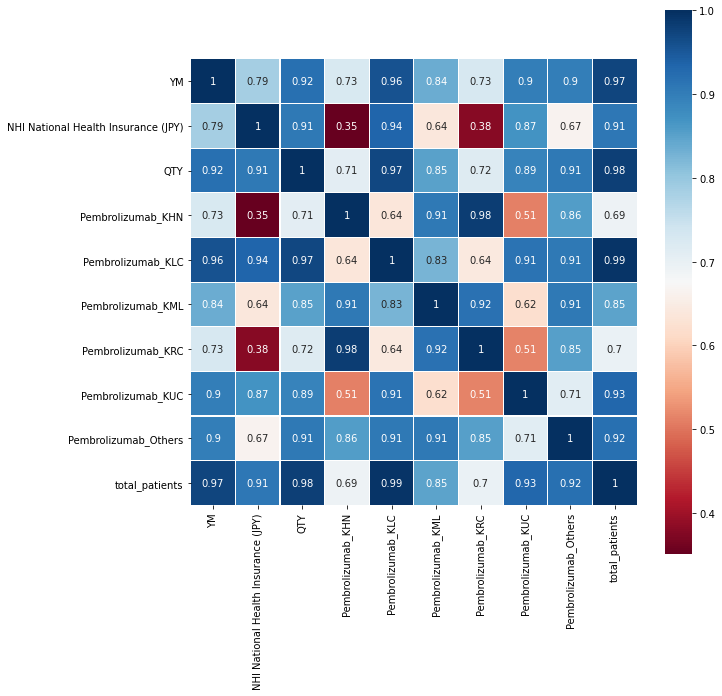

In [36]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(df_YM_sales_patients_keytruda.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [37]:
# here we see that total patients are correlated with QTY by 0.98
# also, patients in KLC is correlated with total patients by 0.99 , this is good as we are starting our base modeling using KLC by approach 1

In [38]:
# hospital_type_mapping = {'Pharmacy': 'Pharmacy', 'GP': ['Doctors Association', 'Hospital/Clinic', 'Others'] , 
#                          'HP': ['Major Hospital (>500 bed)', 'Mid-sized Hospital (200~499 Beds)', 'University Hospital']
#                         }

In [39]:
df_trgt = pd.read_excel("N001_Ins_Master.xlsx",usecols=[i for i in range(39) if i not in (1,2,3,4,6,8,10,12,14,16,17,18)])
df_trgt =df_trgt.dropna(subset=['KLC_TGT', 'KUC_TGT', 'KRC_TGT', 'KHN_TGT', 'KML_TGT', 'KHL_TGT', 'KMS_TGT', 'KES_TGT',
                           'KX_TGT'], how='all')
df_trgt.Ins_Code = df_trgt.Ins_Code.astype(int)
df_trgt.shape

# print("Keytruda unique accounts for which we have target flags:",len(set(df_trgt['Ins_Code'])))
# print("Keytruda unique accounts for which have Sales (Yen) >0 from 201702:",len(set(df_inhouse_sales_by_account_trget[df_inhouse_sales_by_account_trget['NHI National Health Insurance (JPY)']>0]['Ins_Code'])))
# print("Keytruda Target Accounts:",len(set(df_inhouse_sales_by_account_trget[df_inhouse_sales_by_account_trget['NHI National Health Insurance (JPY)']>0]['Ins_Code']).intersection(set(df_trgt['Ins_Code']))))

print("Keytruda unique accounts for which we have target flags:",len(set(df_trgt['Ins_Code'])))
print("Keytruda unique accounts for which have Sales from 201702:",len(set(df_inhouse_sales_by_account_trget['Ins_Code'])))
print("Keytruda Target Accounts:",len(set(df_inhouse_sales_by_account_trget['Ins_Code']).intersection(set(df_trgt['Ins_Code']))))

# target_acc = pd.DataFrame()
# target_acc['target_accounts'] = list(set(df_inhouse_sales_by_account_trget[df_inhouse_sales_by_account_trget['NHI National Health Insurance (JPY)']>0]['Ins_Code']).intersection(set(df_trgt['Ins_Code'])))
# target_acc.to_csv('target_accounts.csv',index=False)

target_acc = pd.DataFrame()
target_acc['target_accounts'] = list(set(df_inhouse_sales_by_account_trget['Ins_Code']).intersection(set(df_trgt['Ins_Code'])))
target_acc.to_csv('target_accounts.csv',index=False)

# non_target_acc = pd.DataFrame()
# non_target_acc['non_target_accounts'] = list(set(df_inhouse_sales_by_account_trget[df_inhouse_sales_by_account_trget['NHI National Health Insurance (JPY)']>0]['Ins_Code']).difference(set(df_trgt['Ins_Code'])))
# non_target_acc.to_csv('non_target_accounts.csv',index=False)

non_target_acc = pd.DataFrame()
non_target_acc['non_target_accounts'] = list(set(df_inhouse_sales_by_account_trget['Ins_Code']).difference(set(df_trgt['Ins_Code'])))
non_target_acc.to_csv('non_target_accounts.csv',index=False)

target_acc_sales = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'][df_inhouse_sales_by_account['Ins_Code'].isin(list(target_acc['target_accounts']))]['NHI National Health Insurance (JPY)'].sum()

nontarget_acc_sales = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'][df_inhouse_sales_by_account['Ins_Code'].isin(list(non_target_acc['non_target_accounts']))]['NHI National Health Insurance (JPY)'].sum()

print(nontarget_acc_sales/target_acc_sales)
print(nontarget_acc_sales/(target_acc_sales+nontarget_acc_sales))
print(target_acc_sales/(target_acc_sales+nontarget_acc_sales))

df_inhouse_sales_by_account = df_inhouse_sales_by_account[df_inhouse_sales_by_account['Ins_Code'].isin(list(target_acc['target_accounts']))]

Keytruda unique accounts for which we have target flags: 928
Keytruda unique accounts for which have Sales from 201702: 1357
Keytruda Target Accounts: 914
0.0287478713906222
0.02794452575805763
0.9720554742419424


In [40]:
df_inhouse_sales_by_account

Ins_Code PROD_NAME_ENG      YM  NHI National Health Insurance (JPY)  \
0        1000001      Keytruda  201709                             821082.0   
1        1000001      Keytruda  201710                             821082.0   
2        1000001      Keytruda  201711                            2137193.0   
3        1000001      Keytruda  201712                            2137193.0   
4        1000001      Keytruda  201801                            2958275.0   
...          ...           ...     ...                                  ...   
145900   2026683      Lynparza  202010                             290366.0   
145901   2026683      Lynparza  202011                            1843000.0   
145902   2026683      Lynparza  202012                            2619317.0   
145903   2026683      Lynparza  202101                            2524536.0   
145904   2026683      Lynparza  202102                             580731.0   

        QTY  
0       2.0  
1       2.0  
2       5.2  
3       5.2  
4       7.2  
...     ...  
145900  1.0  
145901  6.3  
145902  9.0  
145903  8.7  
145904  2.0  

[78219 rows x 5 columns]

In [41]:
# df_inhouse_sales_by_account.to_csv('inhouse_sales_for_target_accounts.csv',index=False)

In [42]:
df_target_inhouse_sales_by_YM = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'].groupby('YM').agg({'NHI National Health Insurance (JPY)':'sum','QTY':'sum'}).reset_index()
df_target_inhouse_sales_by_YM

YM  NHI National Health Insurance (JPY)      QTY
0   201702                         4.701825e+07    114.4
1   201703                         6.221503e+08   1515.4
2   201704                         1.489506e+09   3627.0
3   201705                         2.063888e+09   5026.6
4   201706                         2.680972e+09   6529.2
5   201707                         3.006884e+09   7322.2
6   201708                         3.609877e+09   8791.4
7   201709                         3.422387e+09   8333.8
8   201710                         4.096516e+09   9975.8
9   201711                         4.313293e+09  10504.0
10  201712                         4.596108e+09  11191.2
11  201801                         4.582076e+09  11159.6
12  201802                         5.265153e+09  12822.4
13  201803                         5.300156e+09  12908.0
14  201804                         6.365644e+09  17452.8
15  201805                         6.149319e+09  16860.8
16  201806                         6.325430e+09  17346.0
17  201807                         6.458562e+09  17711.0
18  201808                         7.212310e+09  19778.6
19  201809                         6.112720e+09  16761.8
20  201810                         7.553954e+09  20716.2
21  201811                         7.277188e+09  19955.2
22  201812                         7.563163e+09  20743.4
23  201901                         8.041951e+09  22055.0
24  201902                         8.206546e+09  22508.4
25  201903                         7.894259e+09  21651.8
26  201904                         1.109745e+10  30437.6
27  201905                         9.492570e+09  26035.4
28  201906                         1.010361e+10  27711.4
29  201907                         1.103529e+10  30266.8
30  201908                         1.176022e+10  32255.0
31  201909                         1.356832e+10  37214.0
32  201910                         1.038560e+10  27967.0
33  201911                         1.085716e+10  29237.0
34  201912                         1.224190e+10  32966.0
35  202001                         1.090842e+10  29375.0
36  202002                         1.059100e+10  34585.0
37  202003                         9.671388e+09  31582.0
38  202004                         1.011206e+10  41724.0
39  202005                         7.433517e+09  30672.0
40  202006                         9.522125e+09  39290.0
41  202007                         9.392955e+09  38757.0
42  202008                         9.150114e+09  37755.0
43  202009                         9.216514e+09  38029.0
44  202010                         1.049494e+10  43304.0
45  202011                         9.256757e+09  38195.0
46  202012                         1.031464e+10  42560.0
47  202101                         9.950361e+09  41057.0
48  202102                         6.073887e+09  25062.0

In [43]:
df_target_YM_sales_patients_keytruda = df_target_inhouse_sales_by_YM.merge(df_monthly_patient_count_keytruda,on='YM',how='left')

<AxesSubplot:>

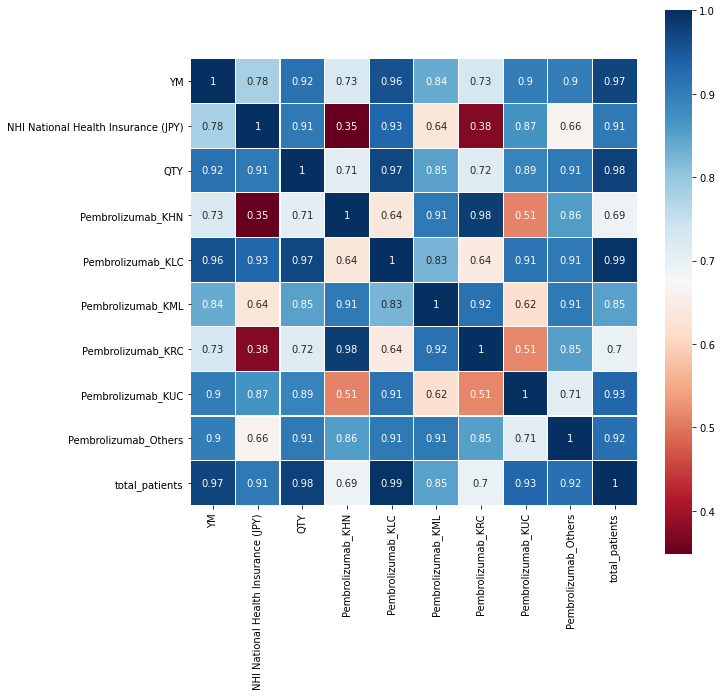

In [44]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(df_target_YM_sales_patients_keytruda.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

#### DDD sales

In [45]:
df_market_sales_from_201804 = pd.read_csv("S002_Market_Sales_from_201804.csv", encoding= 'ansi')
df_market_sales_from_201804.drop(columns=['BRICK_NAME','Ins_DCF_Code','Ins_Name_abbr','ATC3_CODE','ATC3_NAME',
                                         'PROD3_CODE','PROD3_NAME','ATC3_NAME_ENG','PROD_oldest_data_month'],inplace=True)

df_DDD = df_market_sales_from_201804[df_market_sales_from_201804['Ins_Code'].notnull()]
df_DDD = df_DDD[df_DDD['Ins_Code'].isin(list(target_acc['target_accounts']))]
print(df_DDD.shape, len(set(df_DDD.Ins_Code)))

(705413, 6) 914


In [46]:
df_DDD.YM.min(), df_DDD.YM.max()

(201804, 202101)

In [47]:
target_acc

target_accounts
0            1021953
1            1222663
2            1064968
3            1206279
4            1048588
..               ...
909          1048565
910          1048566
911          1023991
912          1060858
913          1234943

[914 rows x 1 columns]

In [48]:
# df_DDD.to_csv('market_sales_for_target_accounts.csv',index=False)

In [49]:
print(df_DDD.shape)
print(df_DDD.isnull().sum())
print(df_DDD.nunique())
print(df_DDD.PROD3_NAME_ENG.unique())

(705413, 6)
BRICK_CODE        0
BRICK_CLASS       0
Ins_Code          0
PROD3_NAME_ENG    0
YM                0
YEN               0
dtype: int64
BRICK_CODE           922
BRICK_CLASS            2
Ins_Code             914
PROD3_NAME_ENG        74
YM                    34
YEN               109711
dtype: int64
['S 1 TAIHO COM.OD T' 'CAPECITABINE SAWAI' 'CAPECITABINE YAKUL' 'ALIMTA'
 'TS 1 COMBINATION T' 'TS 1 COMBINATION T OD' 'XELODA' 'PERJETA' 'KADCYLA'
 'ADCETRIS' 'OPDIVO' 'CYRAMZA' 'YERVOY' 'KEYTRUDA' 'BAVENCIO' 'TECENTRIQ'
 'IMFINZI' 'AVASTIN' 'ERBITUX' 'HERCEPTIN WO/DILUENT' 'VECTIBIX' 'INLYTA'
 'VOTRIENT' 'STIVARGA' 'GIOTRIF' 'ALECENSA' 'LENVIMA' 'MEKINIST'
 'TAFINLAR' 'TAGRISSO' 'IBRANCE' 'VERZENIO' 'GEFITINIB DSEP' 'BRAFTOVI'
 'MEKTOVI' 'ROZLYTREK' 'CABOMETYX' 'TEPMETKO' 'AFINITOR' 'IRESSA'
 'NEXAVAR' 'SUTENT' 'TARCEVA' 'TASIGNA' 'IMMUNOBLADDER <VIAL> YAM'
 'LYNPARZA' 'ZEJULA' 'HALAVEN' 'FASLODEX' 'NKS 1 COMBINATIO.T OD'
 'S 1 MEIJI COMBIN.T' 'GEFITINIB NK' 'NKS 1 COMBINATIO.T'
 '

In [50]:
df_DDD

BRICK_CODE BRICK_CLASS   Ins_Code            PROD3_NAME_ENG      YM  \
0           1000002          HP  1048566.0        S 1 TAIHO COM.OD T  201902   
1           1000002          HP  1048566.0        S 1 TAIHO COM.OD T  201903   
2           1000002          HP  1048566.0        S 1 TAIHO COM.OD T  201904   
3           1000002          HP  1048566.0        S 1 TAIHO COM.OD T  201905   
4           1000002          HP  1048566.0        S 1 TAIHO COM.OD T  201906   
...             ...         ...        ...                       ...     ...   
6742375  4621001012          GP  1225817.0  IMMUNOBLADDER <VIAL> YAM  202008   
6742376  4621001012          GP  1225817.0  IMMUNOBLADDER <VIAL> YAM  202009   
6742377  4621001012          GP  1225817.0  IMMUNOBLADDER <VIAL> YAM  202010   
6742378  4621001012          GP  1225817.0  IMMUNOBLADDER <VIAL> YAM  202011   
6742379  4621001012          GP  1225817.0  IMMUNOBLADDER <VIAL> YAM  202012   

             YEN  
0        2422908  
1        1912896  
2        2595156  
3        2768676  
4        2616624  
...          ...  
6742375   130080  
6742376   268290  
6742377    56910  
6742378   121950  
6742379   178860  

[705413 rows x 6 columns]

In [51]:
df_DDD.PROD3_NAME_ENG.unique()

array(['S 1 TAIHO COM.OD T', 'CAPECITABINE SAWAI', 'CAPECITABINE YAKUL',
       'ALIMTA', 'TS 1 COMBINATION T', 'TS 1 COMBINATION T OD', 'XELODA',
       'PERJETA', 'KADCYLA', 'ADCETRIS', 'OPDIVO', 'CYRAMZA', 'YERVOY',
       'KEYTRUDA', 'BAVENCIO', 'TECENTRIQ', 'IMFINZI', 'AVASTIN',
       'ERBITUX', 'HERCEPTIN WO/DILUENT', 'VECTIBIX', 'INLYTA',
       'VOTRIENT', 'STIVARGA', 'GIOTRIF', 'ALECENSA', 'LENVIMA',
       'MEKINIST', 'TAFINLAR', 'TAGRISSO', 'IBRANCE', 'VERZENIO',
       'GEFITINIB DSEP', 'BRAFTOVI', 'MEKTOVI', 'ROZLYTREK', 'CABOMETYX',
       'TEPMETKO', 'AFINITOR', 'IRESSA', 'NEXAVAR', 'SUTENT', 'TARCEVA',
       'TASIGNA', 'IMMUNOBLADDER <VIAL> YAM', 'LYNPARZA', 'ZEJULA',
       'HALAVEN', 'FASLODEX', 'NKS 1 COMBINATIO.T OD',
       'S 1 MEIJI COMBIN.T', 'GEFITINIB NK', 'NKS 1 COMBINATIO.T',
       'CAPECITABINE TOWA', 'CAPECITABINE NICHI', 'TS 1 COMBINATION T 20',
       '5 FU KYOWA KIRIN', 'GEFITINIB YAKULT', 'NKS 1 COMBINATIO.T 20',
       'CAPECITABINE JG', 'TS 1 COMB

In [52]:
# df_DDD = df_DDD[df_DDD['PROD3_NAME_ENG']!='5 FU KYOWA KIRIN'].reset_index(drop=True)
# df_DDD

In [53]:
# df_DDD[df_DDD.duplicated(['INS_YM','PROD3_NAME_ENG'],keep=False)].sort_values(['INS_YM','PROD3_NAME_ENG'])['PROD3_NAME_ENG'].unique()

In [54]:
df_DDD_YM_competitor_sales = df_DDD.groupby(['PROD3_NAME_ENG','YM']).agg({'YEN':'sum'}).reset_index().pivot(index='YM',columns='PROD3_NAME_ENG',values='YEN').reset_index()
df_DDD_YM_competitor_sales

PROD3_NAME_ENG      YM  5 FU KYOWA KIRIN      ADCETRIS     AFINITOR  \
0               201804               NaN  3.907231e+08          NaN   
1               201805               NaN  3.688352e+08          NaN   
2               201806               NaN  3.693009e+08          NaN   
3               201807               NaN  3.842033e+08          NaN   
4               201808               NaN  3.967773e+08          NaN   
5               201809               NaN  3.697666e+08          NaN   
6               201810               NaN  4.498672e+08          NaN   
7               201811               NaN  4.903832e+08          NaN   
8               201812               NaN  5.690866e+08          NaN   
9               201901               NaN  5.406789e+08          NaN   
10              201902        63383355.0  5.760721e+08  527581926.0   
11              201903        61841055.0  5.499929e+08  498799538.0   
12              201904        77728203.0  7.246308e+08  786076738.0   
13              201905        59841254.0  6.156567e+08  579830906.0   
14              201906        63925055.0  5.933031e+08  588542778.0   
15              201907        69475863.0  6.780607e+08  658145041.0   
16              201908        65411932.0  6.687466e+08  630315772.0   
17              201909        61796126.0  6.706094e+08  686939611.0   
18              201910        68520537.0  7.257172e+08  720394006.0   
19              201911        60883149.0  6.265833e+08  643554974.0   
20              201912        66944290.0  7.157564e+08  678796904.0   
21              202001        57281198.0  6.967834e+08  672088580.0   
22              202002        55121577.0  7.850079e+08  596265442.0   
23              202003        56872804.0  8.779756e+08  586249802.0   
24              202004        64521201.0  1.144072e+09  942266387.0   
25              202005        47837690.0  8.608999e+08  592495123.0   
26              202006        56473890.0  1.062962e+09  627789651.0   
27              202007        60045162.0  1.105177e+09  686647096.0   
28              202008        51852343.0  9.951338e+08  646922087.0   
29              202009        52789204.0  9.747379e+08  618303303.0   
30              202010        54715266.0  1.006043e+09  755448046.0   
31              202011        50685969.0  8.836675e+08  632308504.0   
32              202012        54218391.0  1.048733e+09  758842908.0   
33              202101        48404518.0  9.154472e+08  641221055.0   

PROD3_NAME_ENG      AKALUX      ALECENSA        ALIMTA       AVASTIN  \
0                      NaN           NaN  2.954290e+09  8.825386e+09   
1                      NaN           NaN  2.635835e+09  8.185535e+09   
2                      NaN           NaN  2.598338e+09  8.366398e+09   
3                      NaN           NaN  2.686894e+09  8.139625e+09   
4                      NaN           NaN  2.821622e+09  8.927263e+09   
5                      NaN           NaN  2.403802e+09  7.622200e+09   
6                      NaN           NaN  2.857378e+09  8.926395e+09   
7                      NaN           NaN  2.697869e+09  8.514361e+09   
8                      NaN           NaN  2.720625e+09  8.549084e+09   
9                      NaN           NaN  2.505321e+09  7.565245e+09   
10                     NaN  1.521076e+09  2.589973e+09  7.720502e+09   
11                     NaN  1.528299e+09  2.533738e+09  7.573249e+09   
12                     NaN  2.113427e+09  3.483980e+09  9.629146e+09   
13                     NaN  1.773718e+09  2.608216e+09  7.506022e+09   
14                     NaN  1.600994e+09  2.805248e+09  8.165891e+09   
15                     NaN  1.853247e+09  3.133337e+09  8.562695e+09   
16                     NaN  1.804241e+09  3.094189e+09  8.516776e+09   
17                     NaN  1.941369e+09  3.607701e+09  9.881653e+09   
18                     NaN  1.726453e+09  2.852038e+09  7.199704e+09   
19                     NaN  1.737941e+09  2.959302e+09  7.760939e+09   
20

In [55]:
df_DDD_YM_competitor_sales['total_sales'] = df_DDD_YM_competitor_sales.iloc[:,2:].sum(axis = 1, skipna = True)
df_DDD_YM_competitor_sales

PROD3_NAME_ENG      YM  5 FU KYOWA KIRIN      ADCETRIS     AFINITOR  \
0               201804               NaN  3.907231e+08          NaN   
1               201805               NaN  3.688352e+08          NaN   
2               201806               NaN  3.693009e+08          NaN   
3               201807               NaN  3.842033e+08          NaN   
4               201808               NaN  3.967773e+08          NaN   
5               201809               NaN  3.697666e+08          NaN   
6               201810               NaN  4.498672e+08          NaN   
7               201811               NaN  4.903832e+08          NaN   
8               201812               NaN  5.690866e+08          NaN   
9               201901               NaN  5.406789e+08          NaN   
10              201902        63383355.0  5.760721e+08  527581926.0   
11              201903        61841055.0  5.499929e+08  498799538.0   
12              201904        77728203.0  7.246308e+08  786076738.0   
13              201905        59841254.0  6.156567e+08  579830906.0   
14              201906        63925055.0  5.933031e+08  588542778.0   
15              201907        69475863.0  6.780607e+08  658145041.0   
16              201908        65411932.0  6.687466e+08  630315772.0   
17              201909        61796126.0  6.706094e+08  686939611.0   
18              201910        68520537.0  7.257172e+08  720394006.0   
19              201911        60883149.0  6.265833e+08  643554974.0   
20              201912        66944290.0  7.157564e+08  678796904.0   
21              202001        57281198.0  6.967834e+08  672088580.0   
22              202002        55121577.0  7.850079e+08  596265442.0   
23              202003        56872804.0  8.779756e+08  586249802.0   
24              202004        64521201.0  1.144072e+09  942266387.0   
25              202005        47837690.0  8.608999e+08  592495123.0   
26              202006        56473890.0  1.062962e+09  627789651.0   
27              202007        60045162.0  1.105177e+09  686647096.0   
28              202008        51852343.0  9.951338e+08  646922087.0   
29              202009        52789204.0  9.747379e+08  618303303.0   
30              202010        54715266.0  1.006043e+09  755448046.0   
31              202011        50685969.0  8.836675e+08  632308504.0   
32              202012        54218391.0  1.048733e+09  758842908.0   
33              202101        48404518.0  9.154472e+08  641221055.0   

PROD3_NAME_ENG      AKALUX      ALECENSA        ALIMTA       AVASTIN  \
0                      NaN           NaN  2.954290e+09  8.825386e+09   
1                      NaN           NaN  2.635835e+09  8.185535e+09   
2                      NaN           NaN  2.598338e+09  8.366398e+09   
3                      NaN           NaN  2.686894e+09  8.139625e+09   
4                      NaN           NaN  2.821622e+09  8.927263e+09   
5                      NaN           NaN  2.403802e+09  7.622200e+09   
6                      NaN           NaN  2.857378e+09  8.926395e+09   
7                      NaN           NaN  2.697869e+09  8.514361e+09   
8                      NaN           NaN  2.720625e+09  8.549084e+09   
9                      NaN           NaN  2.505321e+09  7.565245e+09   
10                     NaN  1.521076e+09  2.589973e+09  7.720502e+09   
11                     NaN  1.528299e+09  2.533738e+09  7.573249e+09   
12                     NaN  2.113427e+09  3.483980e+09  9.629146e+09   
13                     NaN  1.773718e+09  2.608216e+09  7.506022e+09   
14                     NaN  1.600994e+09  2.805248e+09  8.165891e+09   
15                     NaN  1.853247e+09  3.133337e+09  8.562695e+09   
16                     NaN  1.804241e+09  3.094189e+09  8.516776e+09   
17                     NaN  1.941369e+09  3.607701e+09  9.881653e+09   
18                     NaN  1.726453e+09  2.852038e+09  7.199704e+09   
19                     NaN  1.737941e+09  2.959302e+09  7.760939e+09   
20

In [56]:
# df_DDD_YM_competitor_sales_key_opd = df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower() or 'opdivo' in col.lower() or 'total' in col.lower() or 'TECENTRIQ' in col.upper()]]
# df_DDD_YM_competitor_sales_key_opd['KEYTRUDA/total'] = df_DDD_YM_competitor_sales_key_opd['KEYTRUDA'] / df_DDD_YM_competitor_sales_key_opd['total_sales']
# df_DDD_YM_competitor_sales_key_opd['OPDIVO/total'] = df_DDD_YM_competitor_sales_key_opd['OPDIVO'] / df_DDD_YM_competitor_sales_key_opd['total_sales']
# df_DDD_YM_competitor_sales_key_opd['TECENTRIQ/total'] = df_DDD_YM_competitor_sales_key_opd['TECENTRIQ'] / df_DDD_YM_competitor_sales_key_opd['total_sales']

In [57]:
# df_DDD_YM_competitor_sales.columns

In [58]:
# colormap = plt.cm.RdBu
# plt.figure(figsize=(10,10))
# sns.heatmap(df_DDD_YM_competitor_sales_key_opd.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [59]:
# df_DDD_YM_competitor_sales = df_DDD.pivot(index='INS_YM',columns='PROD3_NAME_ENG',values='YEN').reset_index()
# df_DDD_YM_competitor_sales['total_sales'] = df_DDD_YM_competitor_sales.iloc[:,2:].sum(axis = 1, skipna = True)
# df_DDD_YM_competitor_sales_key_opd = df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower() or 'opdivo' in col.lower() or 'total' in col.lower()]]
# df_DDD_YM_competitor_sales_key_opd['KEYTRUDA/total'] = df_DDD_YM_competitor_sales_key_opd['KEYTRUDA'] / df_DDD_YM_competitor_sales_key_opd['total_sales']
# df_DDD_YM_competitor_sales_key_opd['OPDIVO/total'] = df_DDD_YM_competitor_sales_key_opd['OPDIVO'] / df_DDD_YM_competitor_sales_key_opd['total_sales']
# df_DDD_YM_competitor_sales_key_opd

In [60]:
# colormap = plt.cm.RdBu
# plt.figure(figsize=(10,10))
# sns.heatmap(df_DDD_YM_competitor_sales_key_opd.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [61]:
df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower() or 'opdivo' in col.lower()]]

PROD3_NAME_ENG      KEYTRUDA        OPDIVO
0               6.267026e+09  8.089956e+09
1               6.118385e+09  7.538668e+09
2               6.287422e+09  7.613199e+09
3               6.396210e+09  7.721973e+09
4               7.154323e+09  8.325365e+09
5               6.051824e+09  7.948111e+09
6               7.468253e+09  9.927857e+09
7               7.219275e+09  8.282515e+09
8               7.506514e+09  7.934841e+09
9               7.958859e+09  7.009993e+09
10              8.148210e+09  7.336161e+09
11              7.861806e+09  7.462233e+09
12              1.096290e+10  8.827429e+09
13              9.437114e+09  6.837869e+09
14              1.000589e+10  7.356407e+09
15              1.095251e+10  7.459867e+09
16              1.164970e+10  8.409334e+09
17              1.338959e+10  9.360934e+09
18              1.034030e+10  6.492543e+09
19              1.079780e+10  7.195183e+09
20              1.216178e+10  8.086367e+09
21              1.096268e+10  6.781301e+09
22              1.048627e+10  7.193030e+09
23              9.753151e+09  8.231513e+09
24              1.002065e+10  9.571454e+09
25              7.404430e+09  7.393096e+09
26              9.553634e+09  8.619637e+09
27              9.405313e+09  9.496136e+09
28              9.184527e+09  8.401707e+09
29              9.243904e+09  8.619627e+09
30              1.048307e+10  9.186959e+09
31              9.281227e+09  8.549437e+09
32              1.035801e+10  9.621899e+09
33              9.861183e+09  8.182217e+09

In [62]:
#ketruda sales / total for all competitors
#Opdivo sales/ total sales

In [63]:
df_DDD_YM_competitor_sales = df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' not in col.lower()] + [col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower()]]

In [64]:
df_DDD[df_DDD['BRICK_CODE']==4310103112][df_DDD['PROD3_NAME_ENG']=='KEYTRUDA']

BRICK_CODE BRICK_CLASS   Ins_Code PROD3_NAME_ENG      YM     YEN
6474247  4310103112          GP  1222070.0       KEYTRUDA  202003  612462
6474248  4310103112          GP  1222070.0       KEYTRUDA  202004  969420
6474249  4310103112          GP  1222070.0       KEYTRUDA  202005  484710
6474250  4310103112          GP  1222070.0       KEYTRUDA  202006  484710
6474251  4310103112          GP  1222070.0       KEYTRUDA  202007  969420
6474252  4310103112          GP  1222070.0       KEYTRUDA  202008  484710
6474253  4310103112          GP  1222070.0       KEYTRUDA  202011  484710
6474254  4310103112          GP  1222070.0       KEYTRUDA  202012  484710
6474255  4310103112          GP  1222070.0       KEYTRUDA  202101  484710
6475804  4310103112          GP  1222699.0       KEYTRUDA  202003  612462
6475805  4310103112          GP  1222699.0       KEYTRUDA  202004  969420
6475806  4310103112          GP  1222699.0       KEYTRUDA  202005  484710
6475807  4310103112          GP  1222699.0       KEYTRUDA  202006  484710
6475808  4310103112          GP  1222699.0       KEYTRUDA  202007  969420
6475809  4310103112          GP  1222699.0       KEYTRUDA  202008  484710
6475810  4310103112          GP  1222699.0       KEYTRUDA  202011  484710
6475811  4310103112          GP  1222699.0       KEYTRUDA  202012  484710
6475812  4310103112          GP  1222699.0       KEYTRUDA  202101  484710

In [65]:
df_brick_acc_dup = df_DDD.groupby('BRICK_CODE').agg({'Ins_Code':'nunique'}).reset_index()
df_brick_acc_dup

BRICK_CODE  Ins_Code
0       1000002         1
1       1000015         1
2       1000027         1
3       1011524         1
4       1011526         1
..          ...       ...
917  4520600702         1
918  4620112102         1
919  4620114302         1
920  4620303202         1
921  4621001012         1

[922 rows x 2 columns]

In [66]:
df_brick_acc_dup[df_brick_acc_dup['Ins_Code']>1]

BRICK_CODE  Ins_Code
912  4310103112         2

In [67]:
df_DDD_YM_competitor_sales = df_DDD.groupby(['PROD3_NAME_ENG','YM']).agg({'YEN':'sum'}).reset_index().pivot(index='YM',columns='PROD3_NAME_ENG',values='YEN').reset_index()
df_DDD_YM_competitor_sales = df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' not in col.lower()] + [col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower()]]

In [68]:
df_DDD_YM_competitor_sales_final = df_DDD_YM_competitor_sales.dropna(axis=1,thresh=17)
df_DDD_YM_competitor_sales.shape[1], df_DDD_YM_competitor_sales_final.shape[1]

(75, 65)

In [69]:
print(df_DDD_YM_competitor_sales_final.shape)
df1 = df_DDD_YM_competitor_sales_final.copy()
corr_matrix = df1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
high_cor = [column for column in upper.columns if (any(upper[column] > 0.7) or any(upper[column] < -0.7))]
print(len(high_cor))
print(high_cor)

(34, 65)
55
['5 FU KYOWA KIRIN', 'ADCETRIS', 'ALECENSA', 'ALIMTA', 'AVASTIN', 'BAVENCIO', 'BRAFTOVI', 'CAPECITABINE NICHI', 'CAPECITABINE TOWA', 'CAPECITABINE YAKUL', 'CYRAMZA', 'ERBITUX', 'FASLODEX', 'GEFITINIB DSEP', 'GEFITINIB JG', 'GEFITINIB NICHIIKO', 'GEFITINIB NK', 'GIOTRIF', 'HALAVEN', 'HERCEPTIN WO/DILUENT', 'IBRANCE', 'IMFINZI', 'INLYTA', 'IRESSA', 'KADCYLA', 'LENVIMA', 'LYNPARZA', 'MEKINIST', 'MEKTOVI', 'NEXAVAR', 'NKS 1 COMBINATIO.T', 'NKS 1 COMBINATIO.T 20', 'NKS 1 COMBINATIO.T 25', 'NKS 1 COMBINATIO.T OD', 'OPDIVO', 'PERJETA', 'ROZLYTREK', 'S 1 TAIHO COM.OD T', 'STIVARGA', 'SUTENT', 'TAFINLAR', 'TAGRISSO', 'TARCEVA', 'TASIGNA', 'TECENTRIQ', 'TS 1 COMBINATION T', 'TS 1 COMBINATION T 20', 'TS 1 COMBINATION T 25', 'TS 1 COMBINATION T OD', 'VECTIBIX', 'VERZENIO', 'VOTRIENT', 'XELODA', 'YERVOY', 'KEYTRUDA']


<AxesSubplot:xlabel='PROD3_NAME_ENG', ylabel='PROD3_NAME_ENG'>

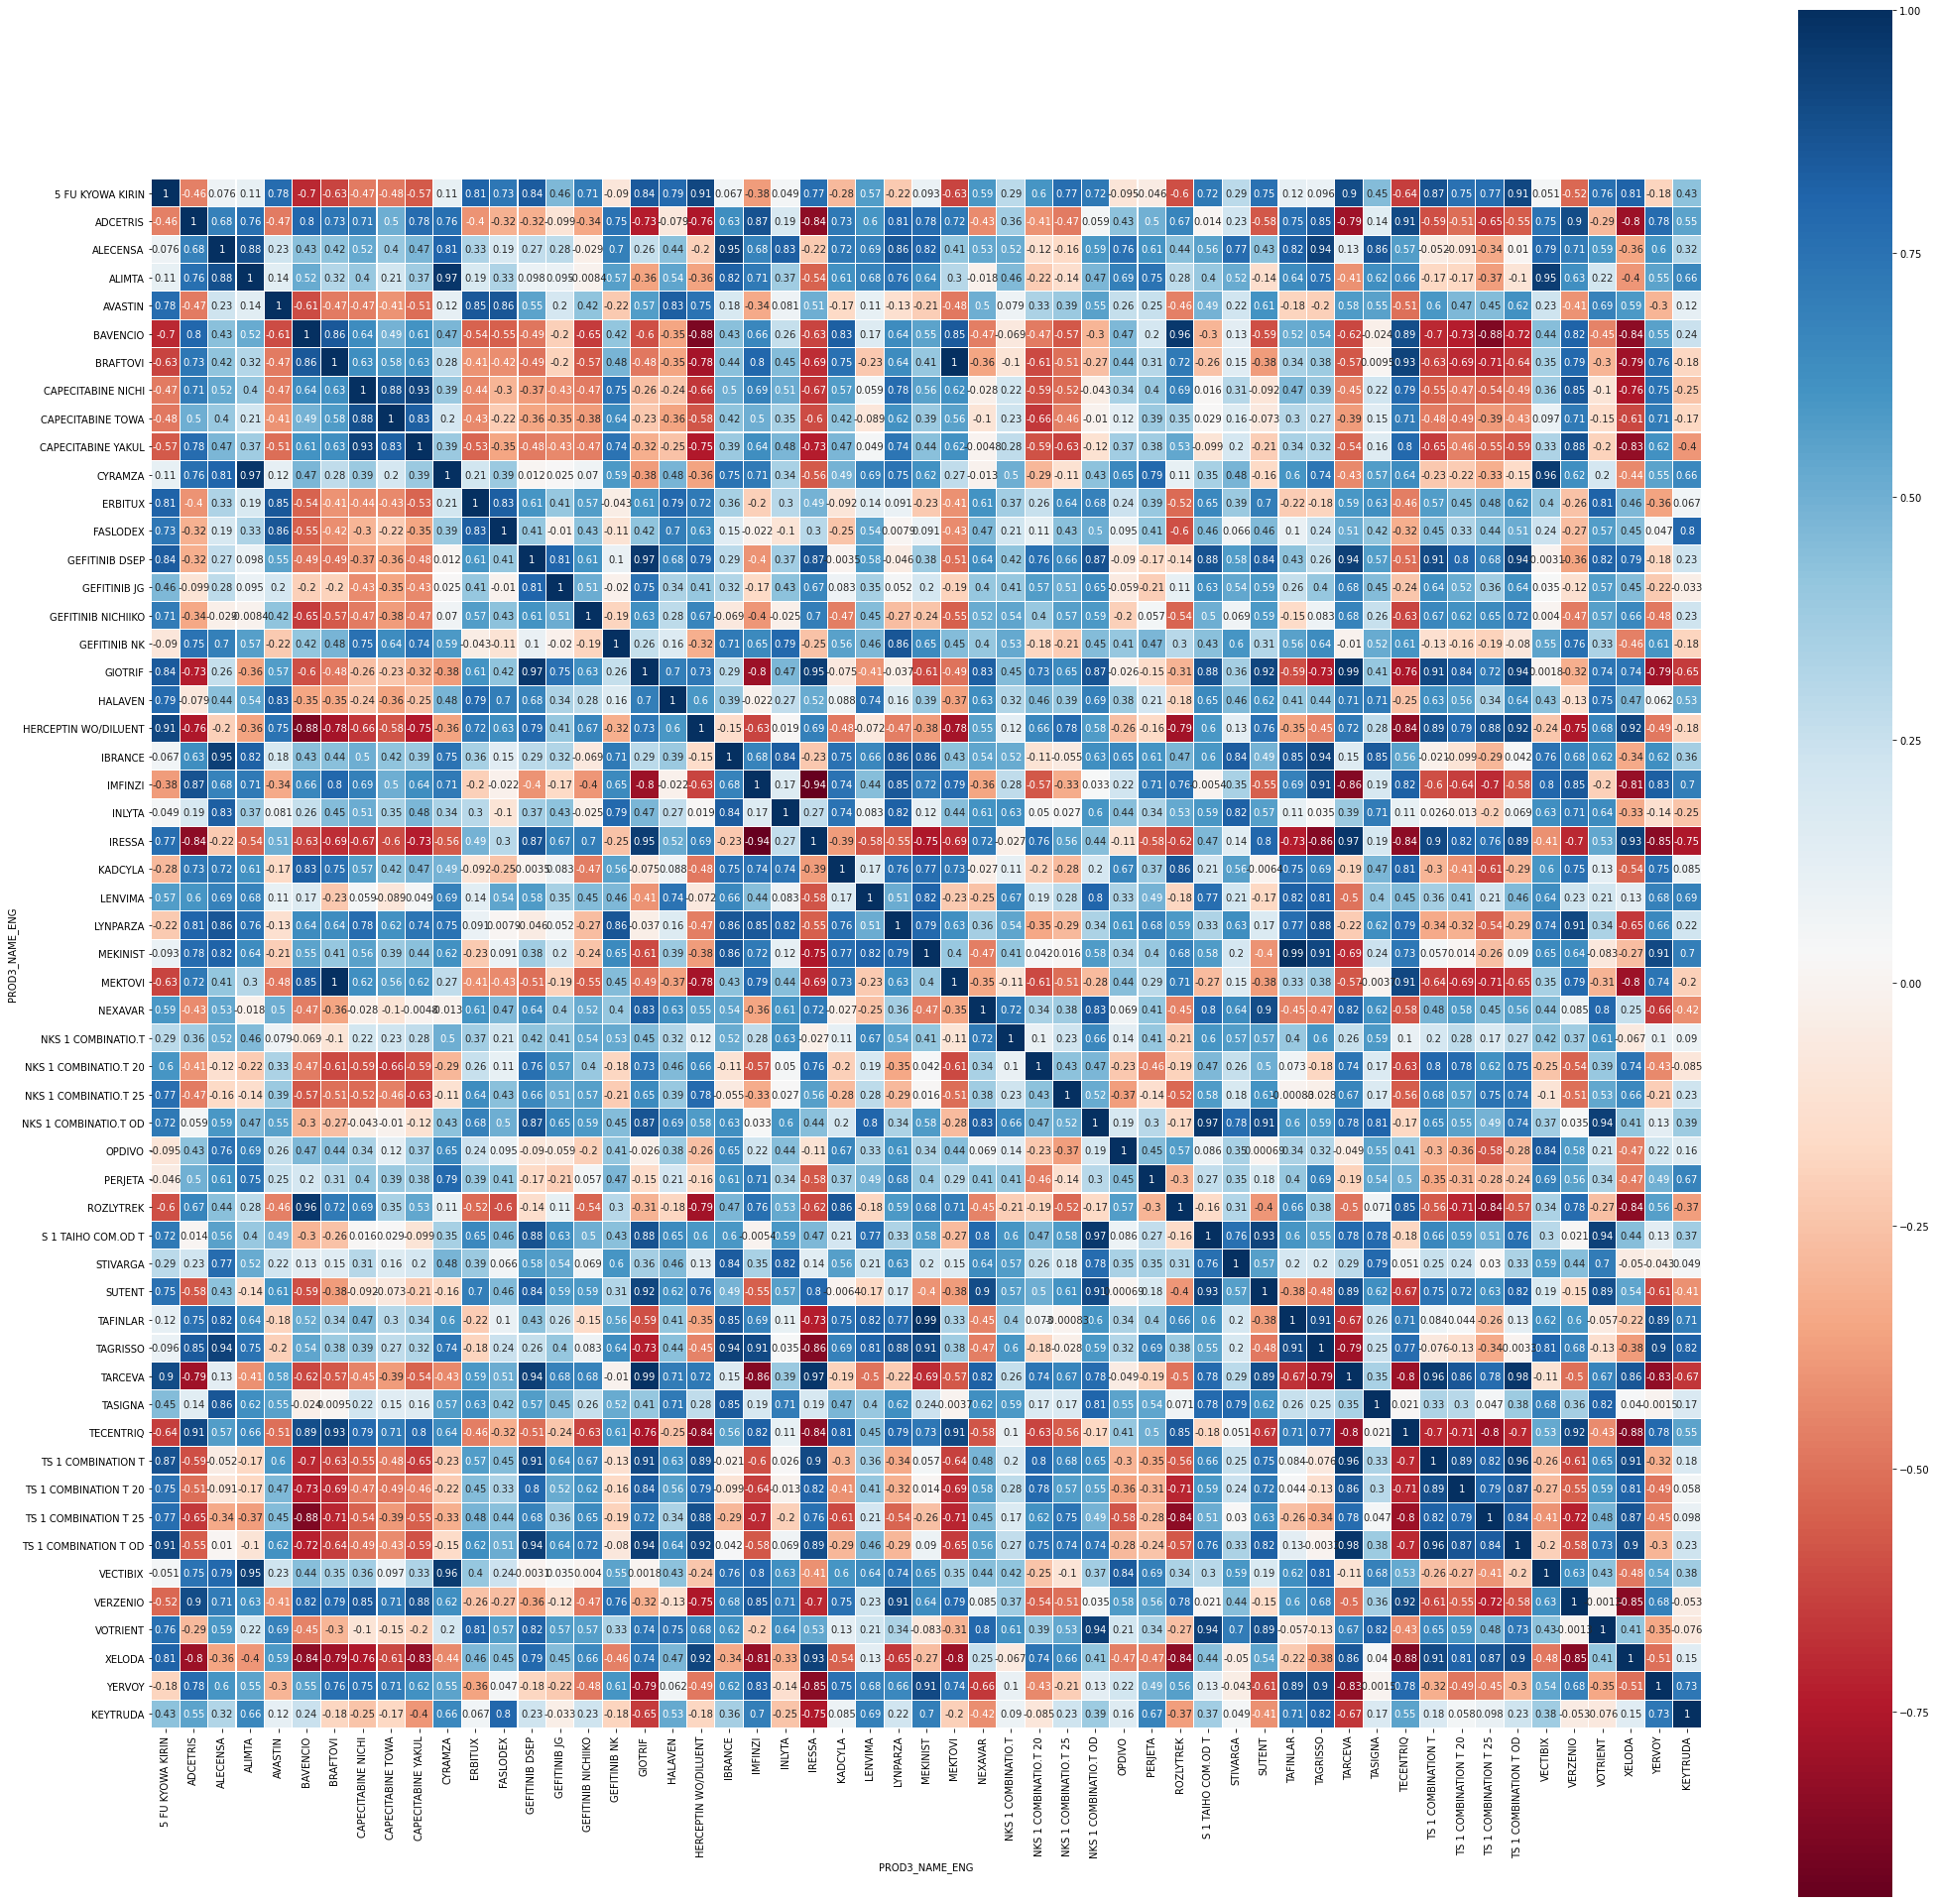

In [70]:
colormap = plt.cm.RdBu
plt.figure(figsize=(35,35))
sns.heatmap(df_DDD_YM_competitor_sales_final[high_cor].corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [71]:
df_target_YM_sales_patients_keytruda_ddd_inhouse_comp = df_target_YM_sales_patients_keytruda.merge(df_DDD_YM_competitor_sales_final[['YM','KEYTRUDA']],on='YM',how='left')
df_target_YM_sales_patients_keytruda_ddd_inhouse_comp

YM  NHI National Health Insurance (JPY)      QTY  Pembrolizumab_KHN  \
0   201702                         4.701825e+07    114.4                NaN   
1   201703                         6.221503e+08   1515.4                NaN   
2   201704                         1.489506e+09   3627.0                0.0   
3   201705                         2.063888e+09   5026.6                0.0   
4   201706                         2.680972e+09   6529.2                0.0   
5   201707                         3.006884e+09   7322.2                0.0   
6   201708                         3.609877e+09   8791.4                0.0   
7   201709                         3.422387e+09   8333.8                0.0   
8   201710                         4.096516e+09   9975.8                0.0   
9   201711                         4.313293e+09  10504.0                0.0   
10  201712                         4.596108e+09  11191.2                0.0   
11  201801                         4.582076e+09  11159.6                0.0   
12  201802                         5.265153e+09  12822.4                0.0   
13  201803                         5.300156e+09  12908.0                0.0   
14  201804                         6.365644e+09  17452.8                0.0   
15  201805                         6.149319e+09  16860.8                0.0   
16  201806                         6.325430e+09  17346.0                0.0   
17  201807                         6.458562e+09  17711.0                0.0   
18  201808                         7.212310e+09  19778.6                0.0   
19  201809                         6.112720e+09  16761.8                0.0   
20  201810                         7.553954e+09  20716.2                0.0   
21  201811                         7.277188e+09  19955.2                0.0   
22  201812                         7.563163e+09  20743.4                0.0   
23  201901                         8.041951e+09  22055.0                0.0   
24  201902                         8.206546e+09  22508.4                0.0   
25  201903                         7.894259e+09  21651.8                0.0   
26  201904                         1.109745e+10  30437.6                0.0   
27  201905                         9.492570e+09  26035.4                0.0   
28  201906                         1.010361e+10  27711.4                0.0   
29  201907                         1.103529e+10  30266.8                0.0   
30  201908                         1.176022e+10  32255.0                0.0   
31  201909                         1.356832e+10  37214.0                0.0   
32  201910                         1.038560e+10  27967.0                0.0   
33  201911                         1.085716e+10  29237.0                0.0   
34  201912                         1.224190e+10  32966.0               13.0   
35  202001                         1.090842e+10  29375.0               22.0   
36  202002                         1.059100e+10  34585.0               37.0   
37  202003                         9.671388e+09  31582.0               47.0   
38  202004                         1.011206e+10  41724.0               61.0   
39  202005                         7.433517e+09  30672.0               70.0   
40  202006                         9.522125e+09  39290.0               89.0   
41  202007                         9.392955e+09  38757.0               79.0   
42  202008                         9.150114e+09  37755.0               84.0   
43  202009                         9.216514e+09  38029.0               88.0   
44  202010                         1.049494e+10  43304.0               96.0   
45  202011                         9.256757e+09  38195.0               97.0   
46  202012                         1.031464e+10  42560.0                NaN   
47  202101                         9.950361e+09  41057.0                NaN   
48  202102                         6.073887e+09  25062.0                NaN   

    Pembrolizumab_KLC  Pembrolizumab_KML  Pembrolizumab_K

<AxesSubplot:>

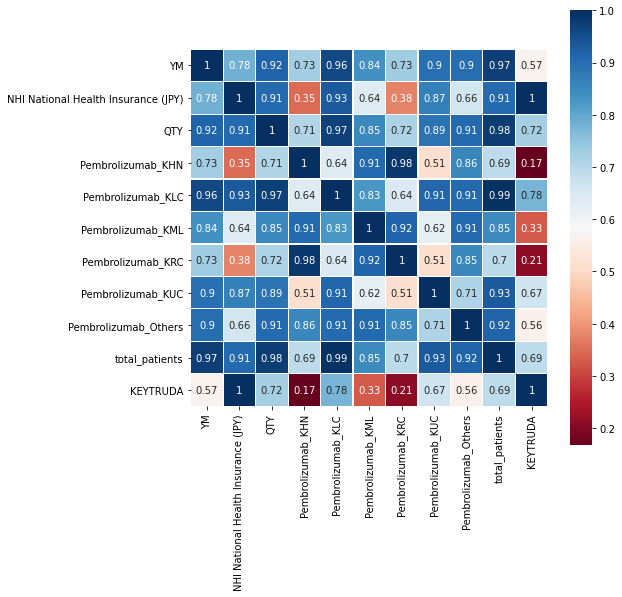

In [72]:
colormap = plt.cm.RdBu
plt.figure(figsize=(8,8))
sns.heatmap(df_target_YM_sales_patients_keytruda.merge(df_DDD_YM_competitor_sales_final[['YM','KEYTRUDA']],on='YM',how='left').corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [73]:
df_DDD_YM_competitor_sales_final

PROD3_NAME_ENG      YM  5 FU KYOWA KIRIN      ADCETRIS     AFINITOR  \
0               201804               NaN  3.907231e+08          NaN   
1               201805               NaN  3.688352e+08          NaN   
2               201806               NaN  3.693009e+08          NaN   
3               201807               NaN  3.842033e+08          NaN   
4               201808               NaN  3.967773e+08          NaN   
5               201809               NaN  3.697666e+08          NaN   
6               201810               NaN  4.498672e+08          NaN   
7               201811               NaN  4.903832e+08          NaN   
8               201812               NaN  5.690866e+08          NaN   
9               201901               NaN  5.406789e+08          NaN   
10              201902        63383355.0  5.760721e+08  527581926.0   
11              201903        61841055.0  5.499929e+08  498799538.0   
12              201904        77728203.0  7.246308e+08  786076738.0   
13              201905        59841254.0  6.156567e+08  579830906.0   
14              201906        63925055.0  5.933031e+08  588542778.0   
15              201907        69475863.0  6.780607e+08  658145041.0   
16              201908        65411932.0  6.687466e+08  630315772.0   
17              201909        61796126.0  6.706094e+08  686939611.0   
18              201910        68520537.0  7.257172e+08  720394006.0   
19              201911        60883149.0  6.265833e+08  643554974.0   
20              201912        66944290.0  7.157564e+08  678796904.0   
21              202001        57281198.0  6.967834e+08  672088580.0   
22              202002        55121577.0  7.850079e+08  596265442.0   
23              202003        56872804.0  8.779756e+08  586249802.0   
24              202004        64521201.0  1.144072e+09  942266387.0   
25              202005        47837690.0  8.608999e+08  592495123.0   
26              202006        56473890.0  1.062962e+09  627789651.0   
27              202007        60045162.0  1.105177e+09  686647096.0   
28              202008        51852343.0  9.951338e+08  646922087.0   
29              202009        52789204.0  9.747379e+08  618303303.0   
30              202010        54715266.0  1.006043e+09  755448046.0   
31              202011        50685969.0  8.836675e+08  632308504.0   
32              202012        54218391.0  1.048733e+09  758842908.0   
33              202101        48404518.0  9.154472e+08  641221055.0   

PROD3_NAME_ENG      ALECENSA        ALIMTA       AVASTIN     BAVENCIO  \
0                        NaN  2.954290e+09  8.825386e+09   11568540.0   
1                        NaN  2.635835e+09  8.185535e+09   13303821.0   
2                        NaN  2.598338e+09  8.366398e+09   13496630.0   
3                        NaN  2.686894e+09  8.139625e+09   21787417.0   
4                        NaN  2.821622e+09  8.927263e+09   25836406.0   
5                        NaN  2.403802e+09  7.622200e+09   22365844.0   
6                        NaN  2.857378e+09  8.926395e+09   27378878.0   
7                        NaN  2.697869e+09  8.514361e+09   28921350.0   
8                        NaN  2.720625e+09  8.549084e+09   22944271.0   
9                        NaN  2.505321e+09  7.565245e+09   24486743.0   
10              1.521076e+09  2.589973e+09  7.720502e+09   20244945.0   
11              1.528299e+09  2.533738e+09  7.573249e+09   26800451.0   
12              2.113427e+09  3.483980e+09  9.629146e+09   25836406.0   
13              1.773718e+09  2.608216e+09  7.506022e+09   29499777.0   
14              1.600994e+09  2.805248e+09  8.165891e+09   27764496.0   
15              1.853247e+09  3.133337e+09  8.562695e+09   39140227.0   
16              1.804241e+09  3.094189e+09  8.516776e+09   35284047.0   
17              1.941369e+09  3.607701e+09  9.881653e+09   30656631.0   
18              1.726453e+09  2.852038e+09  7.199704e+09   39657650.0   
19              1.737941e+09  2.959302e+09  7.760939e+

In [74]:
### overlapping correlations - 

In [75]:
#### 

#### Final Data Preparation

In [76]:
df_inhouse_sales_by_account

Ins_Code PROD_NAME_ENG      YM  NHI National Health Insurance (JPY)  \
0        1000001      Keytruda  201709                             821082.0   
1        1000001      Keytruda  201710                             821082.0   
2        1000001      Keytruda  201711                            2137193.0   
3        1000001      Keytruda  201712                            2137193.0   
4        1000001      Keytruda  201801                            2958275.0   
...          ...           ...     ...                                  ...   
145900   2026683      Lynparza  202010                             290366.0   
145901   2026683      Lynparza  202011                            1843000.0   
145902   2026683      Lynparza  202012                            2619317.0   
145903   2026683      Lynparza  202101                            2524536.0   
145904   2026683      Lynparza  202102                             580731.0   

        QTY  
0       2.0  
1       2.0  
2       5.2  
3       5.2  
4       7.2  
...     ...  
145900  1.0  
145901  6.3  
145902  9.0  
145903  8.7  
145904  2.0  

[78219 rows x 5 columns]

In [77]:
df_inhouse_sales = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'].pivot_table(
        index=['Ins_Code', 'YM'], 
         columns='PROD_NAME_ENG', 
         values=['QTY','NHI National Health Insurance (JPY)']
).reset_index()

df_inhouse_sales.columns = list(map("_".join, df_inhouse_sales.columns))
df_inhouse_sales.rename(columns={'Ins_Code_':'Ins_Code','YM_':'YM'},inplace=True)

In [78]:
df_inhouse_sales.isnull().sum()

Ins_Code                                        0
YM                                              0
NHI National Health Insurance (JPY)_Keytruda    0
QTY_Keytruda                                    0
dtype: int64

In [79]:
df_mdv_indication[df_mdv_indication['Drug']=='Pembrolizumab']

Launch_month           Drug Indication
69        201702  Pembrolizumab        KML
70        201702  Pembrolizumab        KLC
71        201711  Pembrolizumab    Hodgkin
72        201712  Pembrolizumab        KUC
73        201812  Pembrolizumab      MSI-H
74        201912  Pembrolizumab        KRC
75        201912  Pembrolizumab        KHN

In [80]:
keytruda_indication_launch_dict = dict(zip(df_mdv_indication[df_mdv_indication['Drug']=='Pembrolizumab'].Indication, 
                     df_mdv_indication[df_mdv_indication['Drug']=='Pembrolizumab'].Launch_month))
keytruda_indication_launch_dict

{'KML': 201702,
 'KLC': 201702,
 'Hodgkin': 201711,
 'KUC': 201712,
 'MSI-H': 201812,
 'KRC': 201912,
 'KHN': 201912}

In [81]:
df_trgt.head()

Ins_Code HP_GP_TYPE (english)                 Ins_Type (english)  \
0    1000001                   HP         Major Hospital (>500 beds)   
9    1000011                   HP  Mid-sized Hospital (200~499 Beds)   
17   1000021                   HP                University Hospital   
24   1000031                   HP         Major Hospital (>500 beds)   
33   1000040                   HP  Mid-sized Hospital (200~499 Beds)   

    Pref_Code  City_Code  Jis_City_Code  Zip_Code  KLC_DIA  KUC_DIA  KRC_DIA  \
0           1       1101           1101  600011.0      8.0      2.0      3.0   
9           1       1101           1101  600004.0     10.0      9.0      7.0   
17          1       1101           1101  600061.0      6.0      3.0      3.0   
24          1       1101           1101  600033.0      8.0      6.0      5.0   
33          1       1101           1101  600061.0      8.0      8.0      9.0   

    KHN_DIA  KES_DIA  LYNPA_DIA  KML_DIA  KLC_TGT  KUC_TGT  KRC_TGT  KHN_TGT  \
0       8.0     10.0        8.0     11.0      1.0      1.0      1.0      1.0   
9      10.0      7.0        4.0     11.0      1.0      1.0      1.0      NaN   
17      3.0      7.0        3.0      8.0      1.0      1.0      1.0      1.0   
24      NaN     10.0        3.0     11.0      1.0      1.0      1.0      NaN   
33      NaN     10.0        9.0     11.0      1.0      1.0      1.0      NaN   

    KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  PAT_TGT  LYO_TGT  LYNPA_TGT  \
0       1.0      1.0      1.0      NaN     1.0      1.0      1.0        1.0   
9       NaN      NaN      1.0      1.0     NaN      NaN      NaN        1.0   
17      1.0      1.0      1.0      1.0     1.0      1.0      1.0        1.0   
24      NaN      NaN      1.0      NaN     NaN      1.0      1.0        1.0   
33      NaN      NaN      1.0      NaN     NaN      1.0      1.0        NaN   

    LEN_TGT  
0       1.0  
9       NaN  
17      1.0  
24      1.0  
33      NaN

In [82]:
df_inhouse_sales['KML_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KML'],1,0)
df_inhouse_sales['KLC_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KLC'],1,0)
df_inhouse_sales['Hodgkin_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['Hodgkin'],1,0)
df_inhouse_sales['KUC_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KUC'],1,0)
df_inhouse_sales['MSI_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['MSI-H'],1,0)
df_inhouse_sales['KRC_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KRC'],1,0)
df_inhouse_sales['KHN_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KHN'],1,0)

In [83]:
df_inhouse_sales = df_inhouse_sales.merge(df_trgt[['Ins_Code','KLC_TGT','KUC_TGT','KRC_TGT','KHN_TGT','KML_TGT',
                                                  'KHL_TGT','KMS_TGT','KES_TGT','KX_TGT']].fillna(0),
                      on='Ins_Code',how='left')

In [84]:
df_inhouse_sales = df_inhouse_sales.sort_values(['Ins_Code','YM']).reset_index(drop=True)
df_inhouse_sales

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
0       1000001  201709                                      821082.0   
1       1000001  201710                                      821082.0   
2       1000001  201711                                     2137193.0   
3       1000001  201712                                     2137193.0   
4       1000001  201801                                     2958275.0   
...         ...     ...                                           ...   
37769   2024478  202012                                     4847100.0   
37770   2024478  202101                                     4362390.0   
37771   2024478  202102                                     4362390.0   
37772   2026683  202101                                    16964850.0   
37773   2026683  202102                                    12117750.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
0               2.0             1             1                 0   
1               2.0             1             1                 0   
2               5.2             1             1                 1   
3               5.2             1             1                 1   
4               7.2             1             1                 1   
...             ...           ...           ...               ...   
37769          20.0             1             1                 1   
37770          18.0             1             1                 1   
37771          18.0             1             1                 1   
37772          70.0             1             1                 1   
37773          50.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
0                 0             0             0             0      1.0   
1                 0             0             0             0      1.0   
2                 0             0             0             0      1.0   
3                 1             0             0             0      1.0   
4                 1             0             0             0      1.0   
...             ...           ...           ...           ...      ...   
37769             1             1             1             1      1.0   
37770             1             1             1             1      1.0   
37771             1             1             1             1      1.0   
37772             1             1             1             1      1.0   
37773             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  
0          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
1          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
2          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
3          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
4          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
...        ...      ...      ...      ...      ...      ...      ...     ...  
37769      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0  
37770      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0  
37771      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0  
37772      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0  
37773      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0  

[37774 rows x 20 columns]

In [85]:
# df_inhouse_sales = df_inhouse_sales.merge(df_trgt[['Ins_Code','HP_GP_TYPE (english)']], on='Ins_Code',how='left')
# df_inhouse_sales

In [86]:
df_inhouse_sales['YM'].min(),df_inhouse_sales['YM'].max()

(201702, 202102)

In [87]:
df_inhouse_sales

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
0       1000001  201709                                      821082.0   
1       1000001  201710                                      821082.0   
2       1000001  201711                                     2137193.0   
3       1000001  201712                                     2137193.0   
4       1000001  201801                                     2958275.0   
...         ...     ...                                           ...   
37769   2024478  202012                                     4847100.0   
37770   2024478  202101                                     4362390.0   
37771   2024478  202102                                     4362390.0   
37772   2026683  202101                                    16964850.0   
37773   2026683  202102                                    12117750.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
0               2.0             1             1                 0   
1               2.0             1             1                 0   
2               5.2             1             1                 1   
3               5.2             1             1                 1   
4               7.2             1             1                 1   
...             ...           ...           ...               ...   
37769          20.0             1             1                 1   
37770          18.0             1             1                 1   
37771          18.0             1             1                 1   
37772          70.0             1             1                 1   
37773          50.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
0                 0             0             0             0      1.0   
1                 0             0             0             0      1.0   
2                 0             0             0             0      1.0   
3                 1             0             0             0      1.0   
4                 1             0             0             0      1.0   
...             ...           ...           ...           ...      ...   
37769             1             1             1             1      1.0   
37770             1             1             1             1      1.0   
37771             1             1             1             1      1.0   
37772             1             1             1             1      1.0   
37773             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  
0          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
1          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
2          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
3          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
4          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
...        ...      ...      ...      ...      ...      ...      ...     ...  
37769      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0  
37770      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0  
37771      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0  
37772      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0  
37773      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0  

[37774 rows x 20 columns]

In [88]:
df_inhouse_sales['Keytruda_KML_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KML'],np.nan,0)
df_inhouse_sales['Keytruda_KLC_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KLC'],np.nan,0)
df_inhouse_sales['Keytruda_KUC_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KUC'],np.nan,0)
df_inhouse_sales['Keytruda_KRC_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KRC'],np.nan,0)
df_inhouse_sales['Keytruda_KHN_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KHN'],np.nan,0)
df_inhouse_sales['Keytruda_Others_QTY'] = np.nan

# df_inhouse_sales['Hodgkin_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['Hodgkin'],1,0)
# df_inhouse_sales['MSI_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['MSI-H'],1,0)

In [89]:
print(df_inhouse_sales.shape)
df_inhouse_sales.isnull().sum()

(37774, 26)


Ins_Code                                            0
YM                                                  0
NHI National Health Insurance (JPY)_Keytruda        0
QTY_Keytruda                                        0
KML_launched                                        0
KLC_launched                                        0
Hodgkin_launched                                    0
KUC_launched                                        0
MSI_launched                                        0
KRC_launched                                        0
KHN_launched                                        0
KLC_TGT                                             0
KUC_TGT                                             0
KRC_TGT                                             0
KHN_TGT                                             0
KML_TGT                                             0
KHL_TGT                                             0
KMS_TGT                                             0
KES_TGT                     

In [90]:
df_inhouse_sales

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
0       1000001  201709                                      821082.0   
1       1000001  201710                                      821082.0   
2       1000001  201711                                     2137193.0   
3       1000001  201712                                     2137193.0   
4       1000001  201801                                     2958275.0   
...         ...     ...                                           ...   
37769   2024478  202012                                     4847100.0   
37770   2024478  202101                                     4362390.0   
37771   2024478  202102                                     4362390.0   
37772   2026683  202101                                    16964850.0   
37773   2026683  202102                                    12117750.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
0               2.0             1             1                 0   
1               2.0             1             1                 0   
2               5.2             1             1                 1   
3               5.2             1             1                 1   
4               7.2             1             1                 1   
...             ...           ...           ...               ...   
37769          20.0             1             1                 1   
37770          18.0             1             1                 1   
37771          18.0             1             1                 1   
37772          70.0             1             1                 1   
37773          50.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
0                 0             0             0             0      1.0   
1                 0             0             0             0      1.0   
2                 0             0             0             0      1.0   
3                 1             0             0             0      1.0   
4                 1             0             0             0      1.0   
...             ...           ...           ...           ...      ...   
37769             1             1             1             1      1.0   
37770             1             1             1             1      1.0   
37771             1             1             1             1      1.0   
37772             1             1             1             1      1.0   
37773             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  \
0          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
1          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
2          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
3          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
4          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
...        ...      ...      ...      ...      ...      ...      ...     ...   
37769      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37770      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37771      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37772      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   
37773      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   

       Keytruda_KML_QTY  Keytruda_KLC_QTY  Keytruda_KUC_QTY  Keytruda_KRC_QTY  \
0                   NaN               NaN               0.0               0.0   
1                   NaN               NaN               0.0               0.0   
2                   NaN               NaN               0.0               0.0   
3                   NaN               NaN               NaN               0.0   
4                   NaN               NaN     

In [91]:
## generating target variables for KML
filter_for_kml_sales = (df_inhouse_sales['Hodgkin_launched']==0) & (df_inhouse_sales['KUC_launched']==0) & \
                 (df_inhouse_sales['MSI_launched']==0) & (df_inhouse_sales['KRC_launched']==0) & \
                 (df_inhouse_sales['KHN_launched']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KML_TGT']==1) & (df_inhouse_sales['Keytruda_KML_QTY']!=0)
df_inhouse_sales.loc[filter_for_kml_sales,'Keytruda_KML_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_kml_sales,'Keytruda_KML_QTY'])
display(df_inhouse_sales.loc[filter_for_kml_sales,'QTY_Keytruda'])

23032    2.0
32699    2.0
32700    2.0
32701    0.0
32702    4.0
32703    2.0
32704    0.0
Name: Keytruda_KML_QTY, dtype: float64

23032    2.0
32699    2.0
32700    2.0
32701    0.0
32702    4.0
32703    2.0
32704    0.0
Name: QTY_Keytruda, dtype: float64

In [92]:
## generating target variables for KLC
filter_for_klc_sales = (df_inhouse_sales['Hodgkin_launched']==0) & (df_inhouse_sales['KUC_launched']==0) & \
                 (df_inhouse_sales['MSI_launched']==0) & (df_inhouse_sales['KRC_launched']==0) & \
                 (df_inhouse_sales['KHN_launched']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KLC_TGT']==1) & (df_inhouse_sales['Keytruda_KLC_QTY']!=0)
df_inhouse_sales.loc[filter_for_klc_sales,'Keytruda_KLC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_klc_sales,'Keytruda_KLC_QTY'])
display(df_inhouse_sales.loc[filter_for_klc_sales,'QTY_Keytruda'])

316       4.0
317      10.0
318       8.0
319       6.0
320       8.0
         ... 
37324     6.0
37325     6.0
37326     4.0
37327     4.0
37328     6.0
Name: Keytruda_KLC_QTY, Length: 598, dtype: float64

316       4.0
317      10.0
318       8.0
319       6.0
320       8.0
         ... 
37324     6.0
37325     6.0
37326     4.0
37327     4.0
37328     6.0
Name: QTY_Keytruda, Length: 598, dtype: float64

In [93]:
df_inhouse_sales.isnull().sum()

Ins_Code                                            0
YM                                                  0
NHI National Health Insurance (JPY)_Keytruda        0
QTY_Keytruda                                        0
KML_launched                                        0
KLC_launched                                        0
Hodgkin_launched                                    0
KUC_launched                                        0
MSI_launched                                        0
KRC_launched                                        0
KHN_launched                                        0
KLC_TGT                                             0
KUC_TGT                                             0
KRC_TGT                                             0
KHN_TGT                                             0
KML_TGT                                             0
KHL_TGT                                             0
KMS_TGT                                             0
KES_TGT                     

In [94]:
## generating target variables for KUC
filter_for_kuc_sales = (df_inhouse_sales['MSI_launched']==0) & (df_inhouse_sales['KRC_launched']==0) & \
                 (df_inhouse_sales['KHN_launched']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==1) & (df_inhouse_sales['Keytruda_KUC_QTY']!=0)
df_inhouse_sales.loc[filter_for_kuc_sales,'Keytruda_KUC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_kuc_sales,'Keytruda_KUC_QTY'])
display(df_inhouse_sales.loc[filter_for_kuc_sales,'QTY_Keytruda'])

2241      4.0
2242      6.0
2243      2.0
2244      6.0
2245      6.0
         ... 
37202     6.0
37203    12.0
37204    14.0
37205     4.0
37206     4.0
Name: Keytruda_KUC_QTY, Length: 126, dtype: float64

2241      4.0
2242      6.0
2243      2.0
2244      6.0
2245      6.0
         ... 
37202     6.0
37203    12.0
37204    14.0
37205     4.0
37206     4.0
Name: QTY_Keytruda, Length: 126, dtype: float64

In [95]:
df_inhouse_sales

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
0       1000001  201709                                      821082.0   
1       1000001  201710                                      821082.0   
2       1000001  201711                                     2137193.0   
3       1000001  201712                                     2137193.0   
4       1000001  201801                                     2958275.0   
...         ...     ...                                           ...   
37769   2024478  202012                                     4847100.0   
37770   2024478  202101                                     4362390.0   
37771   2024478  202102                                     4362390.0   
37772   2026683  202101                                    16964850.0   
37773   2026683  202102                                    12117750.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
0               2.0             1             1                 0   
1               2.0             1             1                 0   
2               5.2             1             1                 1   
3               5.2             1             1                 1   
4               7.2             1             1                 1   
...             ...           ...           ...               ...   
37769          20.0             1             1                 1   
37770          18.0             1             1                 1   
37771          18.0             1             1                 1   
37772          70.0             1             1                 1   
37773          50.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
0                 0             0             0             0      1.0   
1                 0             0             0             0      1.0   
2                 0             0             0             0      1.0   
3                 1             0             0             0      1.0   
4                 1             0             0             0      1.0   
...             ...           ...           ...           ...      ...   
37769             1             1             1             1      1.0   
37770             1             1             1             1      1.0   
37771             1             1             1             1      1.0   
37772             1             1             1             1      1.0   
37773             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  \
0          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
1          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
2          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
3          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
4          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
...        ...      ...      ...      ...      ...      ...      ...     ...   
37769      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37770      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37771      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37772      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   
37773      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   

       Keytruda_KML_QTY  Keytruda_KLC_QTY  Keytruda_KUC_QTY  Keytruda_KRC_QTY  \
0                   NaN               NaN               0.0               0.0   
1                   NaN               NaN               0.0               0.0   
2                   NaN               NaN               0.0               0.0   
3                   NaN               NaN               NaN               0.0   
4                   NaN               NaN     

In [96]:
## generating target variables for KRC
filter_for_krc_sales = (df_inhouse_sales['KML_TGT']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KHN_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KRC_QTY']!=0)
df_inhouse_sales.loc[filter_for_krc_sales,'Keytruda_KRC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_krc_sales,'Keytruda_KRC_QTY'])
display(df_inhouse_sales.loc[filter_for_krc_sales,'QTY_Keytruda'])

2634     0.0
2635     4.0
2636     0.0
2637     4.0
2638     2.0
2639     2.0
2640     0.0
2641     2.0
2642     6.0
2643     6.0
2644     8.0
2645     2.0
18017    6.0
18018    2.0
18019    4.0
18020    4.0
18021    4.0
18022    4.0
18023    4.0
18024    2.0
18025    2.0
18026    2.0
18027    4.0
18028    4.0
18029    2.0
18982    4.0
18983    2.0
18984    2.0
18985    2.0
18986    2.0
18987    2.0
18988    2.0
18989    2.0
18990    2.0
Name: Keytruda_KRC_QTY, dtype: float64

2634     0.0
2635     4.0
2636     0.0
2637     4.0
2638     2.0
2639     2.0
2640     0.0
2641     2.0
2642     6.0
2643     6.0
2644     8.0
2645     2.0
18017    6.0
18018    2.0
18019    4.0
18020    4.0
18021    4.0
18022    4.0
18023    4.0
18024    2.0
18025    2.0
18026    2.0
18027    4.0
18028    4.0
18029    2.0
18982    4.0
18983    2.0
18984    2.0
18985    2.0
18986    2.0
18987    2.0
18988    2.0
18989    2.0
18990    2.0
Name: QTY_Keytruda, dtype: float64

In [97]:
## generating target variables for KHN
filter_for_khn_sales = (df_inhouse_sales['KML_TGT']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KHN_QTY']!=0)
df_inhouse_sales.loc[filter_for_khn_sales,'Keytruda_KHN_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_khn_sales,'Keytruda_KHN_QTY'])
display(df_inhouse_sales.loc[filter_for_khn_sales,'QTY_Keytruda'])

Series([], Name: Keytruda_KHN_QTY, dtype: float64)

Series([], Name: QTY_Keytruda, dtype: float64)

In [98]:
### Filling based on only Target Flags

In [99]:
## generating target variables for KML again
filter_for_kml_sales = (df_inhouse_sales['KHN_TGT']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KML_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KML_QTY']!=0)
df_inhouse_sales.loc[filter_for_kml_sales,'Keytruda_KML_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_kml_sales,'Keytruda_KML_QTY'])
display(df_inhouse_sales.loc[filter_for_kml_sales,'QTY_Keytruda'])

32699    2.0
32700    2.0
32702    4.0
32703    2.0
32705    2.0
32706    0.0
32707    0.0
32708    2.0
32709    2.0
32710    2.0
32711    2.0
32712    4.0
32713    2.0
32714    2.0
32715    8.0
32716    4.0
32717    4.0
32718    4.0
32719    0.0
32720    2.0
32721    2.0
32722    4.0
32723    2.0
32724    2.0
32725    4.0
32726    2.0
32727    2.0
32728    0.0
Name: Keytruda_KML_QTY, dtype: float64

32699    2.0
32700    2.0
32702    4.0
32703    2.0
32705    2.0
32706    0.0
32707    0.0
32708    2.0
32709    2.0
32710    2.0
32711    2.0
32712    4.0
32713    2.0
32714    2.0
32715    8.0
32716    4.0
32717    4.0
32718    4.0
32719    0.0
32720    2.0
32721    2.0
32722    4.0
32723    2.0
32724    2.0
32725    4.0
32726    2.0
32727    2.0
32728    0.0
Name: QTY_Keytruda, dtype: float64

In [100]:
## generating target variables for KLC again
filter_for_klc_sales = (df_inhouse_sales['KHN_TGT']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KLC_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KLC_QTY']!=0)
df_inhouse_sales.loc[filter_for_klc_sales,'Keytruda_KLC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_klc_sales,'Keytruda_KLC_QTY'])
display(df_inhouse_sales.loc[filter_for_klc_sales,'QTY_Keytruda'])

316       4.0
317      10.0
318       8.0
319       6.0
320       8.0
         ... 
37364    18.0
37365    20.0
37366    12.0
37367    20.0
37368     8.0
Name: Keytruda_KLC_QTY, Length: 3417, dtype: float64

316       4.0
317      10.0
318       8.0
319       6.0
320       8.0
         ... 
37364    18.0
37365    20.0
37366    12.0
37367    20.0
37368     8.0
Name: QTY_Keytruda, Length: 3417, dtype: float64

In [101]:
## generating target variables for KUC again
filter_for_kuc_sales = (df_inhouse_sales['KHN_TGT']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KLC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KUC_QTY']!=0)
df_inhouse_sales.loc[filter_for_kuc_sales,'Keytruda_KUC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_kuc_sales,'Keytruda_KUC_QTY'])
display(df_inhouse_sales.loc[filter_for_kuc_sales,'QTY_Keytruda'])

2241      4.0
2242      6.0
2243      2.0
2244      6.0
2245      6.0
         ... 
37229    10.0
37230    12.0
37231     8.0
37232     4.0
37233     4.0
Name: Keytruda_KUC_QTY, Length: 318, dtype: float64

2241      4.0
2242      6.0
2243      2.0
2244      6.0
2245      6.0
         ... 
37229    10.0
37230    12.0
37231     8.0
37232     4.0
37233     4.0
Name: QTY_Keytruda, Length: 318, dtype: float64

In [102]:
## generating target variables for KRC again
filter_for_krc_sales = (df_inhouse_sales['KHN_TGT']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KRC_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KRC_QTY']!=0)
df_inhouse_sales.loc[filter_for_krc_sales,'Keytruda_KRC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_krc_sales,'Keytruda_KRC_QTY'])
display(df_inhouse_sales.loc[filter_for_krc_sales,'QTY_Keytruda'])

2635     4.0
2637     4.0
2638     2.0
2639     2.0
2641     2.0
2642     6.0
2643     6.0
2644     8.0
2645     2.0
18017    6.0
18018    2.0
18019    4.0
18020    4.0
18021    4.0
18022    4.0
18023    4.0
18024    2.0
18025    2.0
18026    2.0
18027    4.0
18028    4.0
18029    2.0
18982    4.0
18983    2.0
18984    2.0
18985    2.0
18986    2.0
18987    2.0
18988    2.0
18989    2.0
18990    2.0
Name: Keytruda_KRC_QTY, dtype: float64

2635     4.0
2637     4.0
2638     2.0
2639     2.0
2641     2.0
2642     6.0
2643     6.0
2644     8.0
2645     2.0
18017    6.0
18018    2.0
18019    4.0
18020    4.0
18021    4.0
18022    4.0
18023    4.0
18024    2.0
18025    2.0
18026    2.0
18027    4.0
18028    4.0
18029    2.0
18982    4.0
18983    2.0
18984    2.0
18985    2.0
18986    2.0
18987    2.0
18988    2.0
18989    2.0
18990    2.0
Name: QTY_Keytruda, dtype: float64

In [103]:
## generating target variables for KHN again
filter_for_khn_sales = (df_inhouse_sales['KLC_TGT']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KHN_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KHN_QTY']!=0)
df_inhouse_sales.loc[filter_for_khn_sales,'Keytruda_KHN_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_khn_sales,'Keytruda_KHN_QTY'])
display(df_inhouse_sales.loc[filter_for_khn_sales,'QTY_Keytruda'])

Series([], Name: Keytruda_KHN_QTY, dtype: float64)

Series([], Name: QTY_Keytruda, dtype: float64)

In [104]:
df_inhouse_sales

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
0       1000001  201709                                      821082.0   
1       1000001  201710                                      821082.0   
2       1000001  201711                                     2137193.0   
3       1000001  201712                                     2137193.0   
4       1000001  201801                                     2958275.0   
...         ...     ...                                           ...   
37769   2024478  202012                                     4847100.0   
37770   2024478  202101                                     4362390.0   
37771   2024478  202102                                     4362390.0   
37772   2026683  202101                                    16964850.0   
37773   2026683  202102                                    12117750.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
0               2.0             1             1                 0   
1               2.0             1             1                 0   
2               5.2             1             1                 1   
3               5.2             1             1                 1   
4               7.2             1             1                 1   
...             ...           ...           ...               ...   
37769          20.0             1             1                 1   
37770          18.0             1             1                 1   
37771          18.0             1             1                 1   
37772          70.0             1             1                 1   
37773          50.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
0                 0             0             0             0      1.0   
1                 0             0             0             0      1.0   
2                 0             0             0             0      1.0   
3                 1             0             0             0      1.0   
4                 1             0             0             0      1.0   
...             ...           ...           ...           ...      ...   
37769             1             1             1             1      1.0   
37770             1             1             1             1      1.0   
37771             1             1             1             1      1.0   
37772             1             1             1             1      1.0   
37773             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  \
0          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
1          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
2          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
3          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
4          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
...        ...      ...      ...      ...      ...      ...      ...     ...   
37769      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37770      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37771      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37772      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   
37773      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   

       Keytruda_KML_QTY  Keytruda_KLC_QTY  Keytruda_KUC_QTY  Keytruda_KRC_QTY  \
0                   NaN               NaN               0.0               0.0   
1                   NaN               NaN               0.0               0.0   
2                   NaN               NaN               0.0               0.0   
3                   NaN               NaN               NaN               0.0   
4                   NaN               NaN     

In [105]:
print(df_inhouse_sales.shape)
df_inhouse_sales.isnull().sum()

(37774, 26)


Ins_Code                                            0
YM                                                  0
NHI National Health Insurance (JPY)_Keytruda        0
QTY_Keytruda                                        0
KML_launched                                        0
KLC_launched                                        0
Hodgkin_launched                                    0
KUC_launched                                        0
MSI_launched                                        0
KRC_launched                                        0
KHN_launched                                        0
KLC_TGT                                             0
KUC_TGT                                             0
KRC_TGT                                             0
KHN_TGT                                             0
KML_TGT                                             0
KHL_TGT                                             0
KMS_TGT                                             0
KES_TGT                     

In [106]:
# ### initial number:

# Keytruda_KML_QTY                                37774
# Keytruda_KLC_QTY                                37774
# Keytruda_KUC_QTY                                32463
# Keytruda_KRC_QTY                                13138
# Keytruda_KHN_QTY                                13138

In [107]:
df_inhouse_sales[df_inhouse_sales['Keytruda_KLC_QTY'].notnull()]

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
316     1000080  201704                                     1642164.0   
317     1000080  201705                                     4105410.0   
318     1000080  201706                                     3284328.0   
319     1000080  201707                                     2463246.0   
320     1000080  201708                                     3284328.0   
...         ...     ...                                           ...   
37364   1551120  202010                                     4362390.0   
37365   1551120  202011                                     4847100.0   
37366   1551120  202012                                     2908260.0   
37367   1551120  202101                                     4847100.0   
37368   1551120  202102                                     1938840.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
316             4.0             1             1                 0   
317            10.0             1             1                 0   
318             8.0             1             1                 0   
319             6.0             1             1                 0   
320             8.0             1             1                 0   
...             ...           ...           ...               ...   
37364          18.0             1             1                 1   
37365          20.0             1             1                 1   
37366          12.0             1             1                 1   
37367          20.0             1             1                 1   
37368           8.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
316               0             0             0             0      1.0   
317               0             0             0             0      1.0   
318               0             0             0             0      1.0   
319               0             0             0             0      1.0   
320               0             0             0             0      1.0   
...             ...           ...           ...           ...      ...   
37364             1             1             1             1      1.0   
37365             1             1             1             1      1.0   
37366             1             1             1             1      1.0   
37367             1             1             1             1      1.0   
37368             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  \
316        0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
317        0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
318        0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
319        0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
320        0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
...        ...      ...      ...      ...      ...      ...      ...     ...   
37364      0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
37365      0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
37366      0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
37367      0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
37368      0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   

       Keytruda_KML_QTY  Keytruda_KLC_QTY  Keytruda_KUC_QTY  Keytruda_KRC_QTY  \
316                 NaN               4.0               0.0               0.0   
317                 NaN              10.0               0.0               0.0   
318                 NaN               8.0               0.0               0.0   
319                 NaN               6.0               0.0               0.0   
320                 NaN               8.0     

In [108]:
df_inhouse_sales[df_inhouse_sales['Keytruda_KLC_QTY'].notnull()]['Ins_Code'].nunique()

113

In [109]:
### added today:
## generating target variables for KML again
filter_for_kml_0_tgt = (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KML_QTY']!=0)
df_inhouse_sales.loc[filter_for_kml_0_tgt,'Keytruda_KML_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_kml_0_tgt,'Keytruda_KML_QTY'])

42       0.0
43       0.0
44       0.0
45       0.0
46       0.0
        ... 
37761    0.0
37762    0.0
37763    0.0
37772    0.0
37773    0.0
Name: Keytruda_KML_QTY, Length: 31344, dtype: float64

In [110]:
## generating target variables for KLC again
filter_for_klc_0_tgt = (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KLC_QTY']!=0)
df_inhouse_sales.loc[filter_for_klc_0_tgt,'Keytruda_KLC_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_klc_0_tgt,'Keytruda_KLC_QTY'])

804      0.0
805      0.0
806      0.0
885      0.0
886      0.0
        ... 
37671    0.0
37672    0.0
37673    0.0
37674    0.0
37675    0.0
Name: Keytruda_KLC_QTY, Length: 3850, dtype: float64

In [111]:
## generating target variables for KUC again
filter_for_kuc_0_tgt = (df_inhouse_sales['KUC_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KUC_QTY']!=0)
df_inhouse_sales.loc[filter_for_kuc_0_tgt,'Keytruda_KUC_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_kuc_0_tgt,'Keytruda_KUC_QTY'])

233      0.0
234      0.0
235      0.0
236      0.0
237      0.0
        ... 
37759    0.0
37760    0.0
37761    0.0
37762    0.0
37763    0.0
Name: Keytruda_KUC_QTY, Length: 9095, dtype: float64

In [112]:
## generating target variables for KRC again
filter_for_krc_0_tgt = (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KRC_QTY']!=0)
df_inhouse_sales.loc[filter_for_krc_0_tgt,'Keytruda_KRC_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_krc_0_tgt,'Keytruda_KRC_QTY'])

253      0.0
254      0.0
255      0.0
256      0.0
257      0.0
        ... 
37759    0.0
37760    0.0
37761    0.0
37762    0.0
37763    0.0
Name: Keytruda_KRC_QTY, Length: 5304, dtype: float64

In [113]:
## generating target variables for KHN again
filter_for_khn_0_tgt = (df_inhouse_sales['KHN_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KHN_QTY']!=0)
df_inhouse_sales.loc[filter_for_khn_0_tgt,'Keytruda_KHN_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_khn_0_tgt,'Keytruda_KHN_QTY'])

69       0.0
70       0.0
71       0.0
72       0.0
73       0.0
        ... 
37759    0.0
37760    0.0
37761    0.0
37762    0.0
37763    0.0
Name: Keytruda_KHN_QTY, Length: 8196, dtype: float64

In [114]:
## generating target variables for Others 

In [115]:
filter_for_others_0_tgt = (df_inhouse_sales['KML_TGT']==0) & \
                        (df_inhouse_sales['KLC_TGT']==0) & \
                        (df_inhouse_sales['KUC_TGT']==0) & \
                        (df_inhouse_sales['KRC_TGT']==0) & \
                        (df_inhouse_sales['KHN_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_Others_QTY']!=0)
df_inhouse_sales.loc[filter_for_others_0_tgt,'Keytruda_Others_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_others_0_tgt,'Keytruda_Others_QTY'])

804       2.0
805       2.0
806       2.0
1647      2.0
1648      2.0
         ... 
37499    20.0
37500    12.0
37501    12.0
37502    16.0
37503    14.0
Name: Keytruda_Others_QTY, Length: 956, dtype: float64

In [116]:
filter_for_others_1_tgt = (df_inhouse_sales['KHL_TGT']==0) & \
                        (df_inhouse_sales['KMS_TGT']==0) & \
                        (df_inhouse_sales['KES_TGT']==0) & \
                        (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_Others_QTY']!=0)
df_inhouse_sales.loc[filter_for_others_1_tgt,'Keytruda_Others_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_others_1_tgt,'Keytruda_Others_QTY'])

316      0.0
317      0.0
318      0.0
319      0.0
320      0.0
        ... 
37364    0.0
37365    0.0
37366    0.0
37367    0.0
37368    0.0
Name: Keytruda_Others_QTY, Length: 5739, dtype: float64

In [117]:
df_inhouse_sales.isnull().sum()

Ins_Code                                            0
YM                                                  0
NHI National Health Insurance (JPY)_Keytruda        0
QTY_Keytruda                                        0
KML_launched                                        0
KLC_launched                                        0
Hodgkin_launched                                    0
KUC_launched                                        0
MSI_launched                                        0
KRC_launched                                        0
KHN_launched                                        0
KLC_TGT                                             0
KUC_TGT                                             0
KRC_TGT                                             0
KHN_TGT                                             0
KML_TGT                                             0
KHL_TGT                                             0
KMS_TGT                                             0
KES_TGT                     

In [118]:
# ## numbers before today
# Keytruda_KML_QTY                                37743
# Keytruda_KLC_QTY                                34161
# Keytruda_KUC_QTY                                32074
# Keytruda_KRC_QTY                                13104
# Keytruda_KHN_QTY                                13138
# Keytruda_Others_QTY                             37774

### Preparing Data for Optimization

In [119]:
df_inhouse_sales

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
0       1000001  201709                                      821082.0   
1       1000001  201710                                      821082.0   
2       1000001  201711                                     2137193.0   
3       1000001  201712                                     2137193.0   
4       1000001  201801                                     2958275.0   
...         ...     ...                                           ...   
37769   2024478  202012                                     4847100.0   
37770   2024478  202101                                     4362390.0   
37771   2024478  202102                                     4362390.0   
37772   2026683  202101                                    16964850.0   
37773   2026683  202102                                    12117750.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
0               2.0             1             1                 0   
1               2.0             1             1                 0   
2               5.2             1             1                 1   
3               5.2             1             1                 1   
4               7.2             1             1                 1   
...             ...           ...           ...               ...   
37769          20.0             1             1                 1   
37770          18.0             1             1                 1   
37771          18.0             1             1                 1   
37772          70.0             1             1                 1   
37773          50.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
0                 0             0             0             0      1.0   
1                 0             0             0             0      1.0   
2                 0             0             0             0      1.0   
3                 1             0             0             0      1.0   
4                 1             0             0             0      1.0   
...             ...           ...           ...           ...      ...   
37769             1             1             1             1      1.0   
37770             1             1             1             1      1.0   
37771             1             1             1             1      1.0   
37772             1             1             1             1      1.0   
37773             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  \
0          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
1          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
2          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
3          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
4          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
...        ...      ...      ...      ...      ...      ...      ...     ...   
37769      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37770      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37771      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37772      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   
37773      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   

       Keytruda_KML_QTY  Keytruda_KLC_QTY  Keytruda_KUC_QTY  Keytruda_KRC_QTY  \
0                   NaN               NaN               0.0               0.0   
1                   NaN               NaN               0.0               0.0   
2                   NaN               NaN               0.0               0.0   
3                   NaN               NaN               NaN               0.0   
4                   NaN               NaN     

In [120]:
df_inhouse_sales.groupby(['Ins_Code']).agg({'YM':'count'}).head(20)

YM
Ins_Code    
1000001   42
1000011   42
1000021   47
1000031   46
1000040   49
1000050   42
1000070   48
1000080   47
1000090   45
1000110   48
1000140   45
1000150   31
1000170   46
1000220   36
1000290   47
1000310   48
1000410   47
1000430   48
1000440    3
1000450   42

In [121]:
df_inhouse_sales[df_inhouse_sales.Ins_Code == 2024478]

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
37764   2024478  202004                                     2423550.0   
37765   2024478  202008                                     2908260.0   
37766   2024478  202009                                     1454130.0   
37767   2024478  202010                                     6543585.0   
37768   2024478  202011                                     2423550.0   
37769   2024478  202012                                     4847100.0   
37770   2024478  202101                                     4362390.0   
37771   2024478  202102                                     4362390.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
37764          10.0             1             1                 1   
37765          12.0             1             1                 1   
37766           6.0             1             1                 1   
37767          27.0             1             1                 1   
37768          10.0             1             1                 1   
37769          20.0             1             1                 1   
37770          18.0             1             1                 1   
37771          18.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
37764             1             1             1             1      1.0   
37765             1             1             1             1      1.0   
37766             1             1             1             1      1.0   
37767             1             1             1             1      1.0   
37768             1             1             1             1      1.0   
37769             1             1             1             1      1.0   
37770             1             1             1             1      1.0   
37771             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  \
37764      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37765      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37766      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37767      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37768      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37769      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37770      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37771      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   

       Keytruda_KML_QTY  Keytruda_KLC_QTY  Keytruda_KUC_QTY  Keytruda_KRC_QTY  \
37764               NaN               NaN               NaN               NaN   
37765               NaN               NaN               NaN               NaN   
37766               NaN               NaN               NaN               NaN   
37767               NaN               NaN               NaN               NaN   
37768               NaN               NaN               NaN               NaN   
37769               NaN               NaN               NaN               NaN   
37770               NaN               NaN               NaN               NaN   
37771               NaN               NaN               NaN               NaN   

       Keytruda_KHN_QTY  Keytruda_Others_QTY  
37764               NaN                  NaN  
37765               NaN                  NaN  
37766               NaN                  NaN  
37767               NaN                  NaN  
37768               NaN                  NaN  
37769               NaN                  NaN  
37770               NaN                  NaN  
37771               NaN                  NaN

In [122]:
df_inhouse_sales.columns

Index(['Ins_Code', 'YM', 'NHI National Health Insurance (JPY)_Keytruda',
       'QTY_Keytruda', 'KML_launched', 'KLC_launched', 'Hodgkin_launched',
       'KUC_launched', 'MSI_launched', 'KRC_launched', 'KHN_launched',
       'KLC_TGT', 'KUC_TGT', 'KRC_TGT', 'KHN_TGT', 'KML_TGT', 'KHL_TGT',
       'KMS_TGT', 'KES_TGT', 'KX_TGT', 'Keytruda_KML_QTY', 'Keytruda_KLC_QTY',
       'Keytruda_KUC_QTY', 'Keytruda_KRC_QTY', 'Keytruda_KHN_QTY',
       'Keytruda_Others_QTY'],
      dtype='object')

In [123]:
df_inhouse_sales.rename(columns={'NHI National Health Insurance (JPY)_Keytruda':'inhouse_keytruda_sales_YEN', 'QTY_Keytruda':'inhouse_keytruda_sales_QTY'},inplace=True)

In [124]:
df_inhouse_sales

Ins_Code      YM  inhouse_keytruda_sales_YEN  \
0       1000001  201709                    821082.0   
1       1000001  201710                    821082.0   
2       1000001  201711                   2137193.0   
3       1000001  201712                   2137193.0   
4       1000001  201801                   2958275.0   
...         ...     ...                         ...   
37769   2024478  202012                   4847100.0   
37770   2024478  202101                   4362390.0   
37771   2024478  202102                   4362390.0   
37772   2026683  202101                  16964850.0   
37773   2026683  202102                  12117750.0   

       inhouse_keytruda_sales_QTY  KML_launched  KLC_launched  \
0                             2.0             1             1   
1                             2.0             1             1   
2                             5.2             1             1   
3                             5.2             1             1   
4                             7.2             1             1   
...                           ...           ...           ...   
37769                        20.0             1             1   
37770                        18.0             1             1   
37771                        18.0             1             1   
37772                        70.0             1             1   
37773                        50.0             1             1   

       Hodgkin_launched  KUC_launched  MSI_launched  KRC_launched  \
0                     0             0             0             0   
1                     0             0             0             0   
2                     1             0             0             0   
3                     1             1             0             0   
4                     1             1             0             0   
...                 ...           ...           ...           ...   
37769                 1             1             1             1   
37770                 1             1             1             1   
37771                 1             1             1             1   
37772                 1             1             1             1   
37773                 1             1             1             1   

       KHN_launched  KLC_TGT  KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  \
0                 0      1.0      1.0      1.0      1.0      1.0      1.0   
1                 0      1.0      1.0      1.0      1.0      1.0      1.0   
2                 0      1.0      1.0      1.0      1.0      1.0      1.0   
3                 0      1.0      1.0      1.0      1.0      1.0      1.0   
4                 0      1.0      1.0      1.0      1.0      1.0      1.0   
...             ...      ...      ...      ...      ...      ...      ...   
37769             1      1.0      1.0      1.0      1.0      1.0      0.0   
37770             1      1.0      1.0      1.0      1.0      1.0      0.0   
37771             1      1.0      1.0      1.0      1.0      1.0      0.0   
37772             1      1.0      1.0      1.0      1.0      0.0      1.0   
37773             1      1.0      1.0      1.0      1.0      0.0      1.0   

       KMS_TGT  KES_TGT  KX_TGT  Keytruda_KML_QTY  Keytruda_KLC_QTY  \
0          1.0      0.0     1.0               NaN               NaN   
1          1.0      0.0     1.0               NaN               NaN   
2          1.0      0.0     1.0               NaN               NaN   
3          1.0      0.0     1.0               NaN               NaN   
4          1.0      0.0     1.0               NaN               NaN   
...        ...      ...     ...               ...               ...   
37769      1.0      1.0     1.0               NaN               NaN   
37770      1.0      1.0     1.0               NaN               NaN   
37771      1.0      1.0     1.0               NaN               NaN   
37772      1.0      1.0     1.0               0.0               NaN   
37773      1.0      1.0     1.

In [125]:
df_inhouse_sales[['Ins_Code','YM','Keytruda_KML_QTY','Keytruda_KLC_QTY','Keytruda_KUC_QTY','Keytruda_KRC_QTY','Keytruda_KHN_QTY','Keytruda_Others_QTY']]

Ins_Code      YM  Keytruda_KML_QTY  Keytruda_KLC_QTY  Keytruda_KUC_QTY  \
0       1000001  201709               NaN               NaN               0.0   
1       1000001  201710               NaN               NaN               0.0   
2       1000001  201711               NaN               NaN               0.0   
3       1000001  201712               NaN               NaN               NaN   
4       1000001  201801               NaN               NaN               NaN   
...         ...     ...               ...               ...               ...   
37769   2024478  202012               NaN               NaN               NaN   
37770   2024478  202101               NaN               NaN               NaN   
37771   2024478  202102               NaN               NaN               NaN   
37772   2026683  202101               0.0               NaN               NaN   
37773   2026683  202102               0.0               NaN               NaN   

       Keytruda_KRC_QTY  Keytruda_KHN_QTY  Keytruda_Others_QTY  
0                   0.0               0.0                  NaN  
1                   0.0               0.0                  NaN  
2                   0.0               0.0                  NaN  
3                   0.0               0.0                  NaN  
4                   0.0               0.0                  NaN  
...                 ...               ...                  ...  
37769               NaN               NaN                  NaN  
37770               NaN               NaN                  NaN  
37771               NaN               NaN                  NaN  
37772               NaN               NaN                  NaN  
37773               NaN               NaN                  NaN  

[37774 rows x 8 columns]

In [126]:
df_optimization = pd.melt(df_inhouse_sales[['Ins_Code','YM','Keytruda_KML_QTY','Keytruda_KLC_QTY','Keytruda_KUC_QTY',
                          'Keytruda_KRC_QTY','Keytruda_KHN_QTY','Keytruda_Others_QTY']],
        id_vars=['Ins_Code', 'YM'], var_name='Indication', value_name='value').sort_values(['Ins_Code','YM']).reset_index(drop=True)
df_optimization

Ins_Code      YM           Indication  value
0        1000001  201709     Keytruda_KML_QTY    NaN
1        1000001  201709     Keytruda_KLC_QTY    NaN
2        1000001  201709     Keytruda_KUC_QTY    0.0
3        1000001  201709     Keytruda_KRC_QTY    0.0
4        1000001  201709     Keytruda_KHN_QTY    0.0
...          ...     ...                  ...    ...
226639   2026683  202102     Keytruda_KLC_QTY    NaN
226640   2026683  202102     Keytruda_KUC_QTY    NaN
226641   2026683  202102     Keytruda_KRC_QTY    NaN
226642   2026683  202102     Keytruda_KHN_QTY    NaN
226643   2026683  202102  Keytruda_Others_QTY    NaN

[226644 rows x 4 columns]

In [127]:
df_optimization[df_optimization['Indication']=='Keytruda_KML_QTY'].isnull().sum()

Ins_Code         0
YM               0
Indication       0
value         6399
dtype: int64

In [128]:
%%time
df_optimization.isnull().sum()

Wall time: 9.97 ms


Ins_Code           0
YM                 0
Indication         0
value         103510
dtype: int64

In [129]:
df_optimization1 = df_optimization.merge(df_inhouse_sales[['Ins_Code','YM','inhouse_keytruda_sales_YEN','inhouse_keytruda_sales_QTY']],
                      on = ['Ins_Code','YM'], how='left')
df_optimization1

Ins_Code      YM           Indication  value  \
0        1000001  201709     Keytruda_KML_QTY    NaN   
1        1000001  201709     Keytruda_KLC_QTY    NaN   
2        1000001  201709     Keytruda_KUC_QTY    0.0   
3        1000001  201709     Keytruda_KRC_QTY    0.0   
4        1000001  201709     Keytruda_KHN_QTY    0.0   
...          ...     ...                  ...    ...   
226639   2026683  202102     Keytruda_KLC_QTY    NaN   
226640   2026683  202102     Keytruda_KUC_QTY    NaN   
226641   2026683  202102     Keytruda_KRC_QTY    NaN   
226642   2026683  202102     Keytruda_KHN_QTY    NaN   
226643   2026683  202102  Keytruda_Others_QTY    NaN   

        inhouse_keytruda_sales_YEN  inhouse_keytruda_sales_QTY  
0                         821082.0                         2.0  
1                         821082.0                         2.0  
2                         821082.0                         2.0  
3                         821082.0                         2.0  
4                         821082.0                         2.0  
...                            ...                         ...  
226639                  12117750.0                        50.0  
226640                  12117750.0                        50.0  
226641                  12117750.0                        50.0  
226642                  12117750.0                        50.0  
226643                  12117750.0                        50.0  

[226644 rows x 6 columns]

In [130]:
df_optimization1['Indication'].unique()

array(['Keytruda_KML_QTY', 'Keytruda_KLC_QTY', 'Keytruda_KUC_QTY',
       'Keytruda_KRC_QTY', 'Keytruda_KHN_QTY', 'Keytruda_Others_QTY'],
      dtype=object)

In [131]:
df_optimization1['Indication'] = df_optimization1['Indication'].replace({'Keytruda_KML_QTY':'KML', 'Keytruda_KLC_QTY':'KLC', 'Keytruda_KUC_QTY':'KUC',
       'Keytruda_KRC_QTY':'KRC', 'Keytruda_KHN_QTY':'KHN', 'Keytruda_Others_QTY':'Others'})

In [132]:
df_optimization1['Indication'].unique()

array(['KML', 'KLC', 'KUC', 'KRC', 'KHN', 'Others'], dtype=object)

In [133]:
df_optimization1['is_sales_available_for_indication'] = np.where(df_optimization1['value'].notnull(), 1, 0)

In [134]:
df_optimization1['dummy_var2'] = [1,0,0,0,0,0]*int(df_optimization1.shape[0]/6)
df_optimization1

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0        1000001  201709        KML    NaN                    821082.0   
1        1000001  201709        KLC    NaN                    821082.0   
2        1000001  201709        KUC    0.0                    821082.0   
3        1000001  201709        KRC    0.0                    821082.0   
4        1000001  201709        KHN    0.0                    821082.0   
...          ...     ...        ...    ...                         ...   
226639   2026683  202102        KLC    NaN                  12117750.0   
226640   2026683  202102        KUC    NaN                  12117750.0   
226641   2026683  202102        KRC    NaN                  12117750.0   
226642   2026683  202102        KHN    NaN                  12117750.0   
226643   2026683  202102     Others    NaN                  12117750.0   

        inhouse_keytruda_sales_QTY  is_sales_available_for_indication  \
0                              2.0                                  0   
1                              2.0                                  0   
2                              2.0                                  1   
3                              2.0                                  1   
4                              2.0                                  1   
...                            ...                                ...   
226639                        50.0                                  0   
226640                        50.0                                  0   
226641                        50.0                                  0   
226642                        50.0                                  0   
226643                        50.0                                  0   

        dummy_var2  
0                1  
1                0  
2                0  
3                0  
4                0  
...            ...  
226639           0  
226640           0  
226641           0  
226642           0  
226643           0  

[226644 rows x 8 columns]

In [135]:
df_optimization1['YM'].unique()

array([201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004,
       202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012,
       202101, 202102, 201704, 201705, 201706, 201707, 201708, 201702,
       201703], dtype=int64)

In [136]:
df_optimization1[df_optimization1['YM']==201709]

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0        1000001  201709        KML    NaN                    821082.0   
1        1000001  201709        KLC    NaN                    821082.0   
2        1000001  201709        KUC    0.0                    821082.0   
3        1000001  201709        KRC    0.0                    821082.0   
4        1000001  201709        KHN    0.0                    821082.0   
...          ...     ...        ...    ...                         ...   
226333   1708663  201709        KLC    NaN                   6568656.0   
226334   1708663  201709        KUC    0.0                   6568656.0   
226335   1708663  201709        KRC    0.0                   6568656.0   
226336   1708663  201709        KHN    0.0                   6568656.0   
226337   1708663  201709     Others    NaN                   6568656.0   

        inhouse_keytruda_sales_QTY  is_sales_available_for_indication  \
0                              2.0                                  0   
1                              2.0                                  0   
2                              2.0                                  1   
3                              2.0                                  1   
4                              2.0                                  1   
...                            ...                                ...   
226333                        16.0                                  0   
226334                        16.0                                  1   
226335                        16.0                                  1   
226336                        16.0                                  1   
226337                        16.0                                  0   

        dummy_var2  
0                1  
1                0  
2                0  
3                0  
4                0  
...            ...  
226333           0  
226334           0  
226335           0  
226336           0  
226337           0  

[3984 rows x 8 columns]

In [137]:
# var_month = []
# for i in range(5):
#     var_month.append(x[i])
# print(np.sum(var_month))

In [138]:
# np.sum(var_month)

In [139]:
# df_opt = df_optimization1[df_optimization1['Ins_Code'].isin(list(df_optimization1['Ins_Code'].unique())[:1])].copy()
# array_of_sales = np.array(df_opt['inhouse_keytruda_sales_QTY']*df_opt['dummy_var2'])
# array_of_indication_wise_sales = df_opt['value'].values

# for i in list(df_opt['YM'].unique()[:1]):
#     var_month = []
#     var_month_sales = []
#     for j in list(df_opt[df_opt['YM']==i].index):
#         var_month.append(x[j])
#         var_month_sales.append(array_of_sales[j])
#         sales_for_a_month_across_all_accts = np.sum(var_month_sales)
#     print(np.sum(var_month)-( sales_for_a_month_across_all_accts- sales_for_a_month_across_all_accts*alpha_tolerance ))
#     print((sales_for_a_month_across_all_accts + sales_for_a_month_across_all_accts*alpha_tolerance) - np.sum(var_month))

In [140]:
df_DDD[df_DDD.duplicated(['Ins_Code','PROD3_NAME_ENG','YM'])]['PROD3_NAME_ENG'].unique()
df_DDD['Ins_Code'] = df_DDD['Ins_Code'].astype(int)
df_DDD = df_DDD[df_DDD['PROD3_NAME_ENG']!='5 FU KYOWA KIRIN'].reset_index(drop=True)

df_DDD_keytruda_competitors = df_DDD.pivot_table(index=['Ins_Code','YM'],columns='PROD3_NAME_ENG',values='YEN').reset_index()
df_DDD_keytruda_competitors

PROD3_NAME_ENG  Ins_Code      YM   ADCETRIS  AFINITOR  AKALUX   ALECENSA  \
0                1000001  201804        NaN       NaN     NaN        NaN   
1                1000001  201805        NaN       NaN     NaN        NaN   
2                1000001  201806        NaN       NaN     NaN        NaN   
3                1000001  201807        NaN       NaN     NaN        NaN   
4                1000001  201808        NaN       NaN     NaN        NaN   
...                  ...     ...        ...       ...     ...        ...   
31026            2026683  202009  4743250.0 -636180.0     NaN  1509104.0   
31027            2026683  202010  3794600.0       NaN     NaN  8111434.0   
31028            2026683  202011  3794600.0       NaN     NaN  4150036.0   
31029            2026683  202012  1897300.0       NaN     NaN  4150036.0   
31030            2026683  202101  1422975.0       NaN     NaN  3206846.0   

PROD3_NAME_ENG      ALIMTA    AVASTIN   BAVENCIO  BEVACIZUMAB BS PFI  \
0                1997204.0  5092036.0        NaN                 NaN   
1                4268278.0  7178936.0        NaN                 NaN   
2                1219842.0  6469390.0        NaN                 NaN   
3                2085700.0  7095460.0  1542472.0                 NaN   
4                2085700.0  7846744.0  1542472.0                 NaN   
...                    ...        ...        ...                 ...   
31026            7046720.0  5144049.0  1570312.0                 NaN   
31027            7272055.0  6313164.0  1570312.0                 NaN   
31028            8279907.0  5165496.0  1570312.0                 NaN   
31029            9590917.0  6098100.0  2355468.0                 NaN   
31030           11143640.0  7561248.0   785156.0                 NaN   

PROD3_NAME_ENG  BRAFTOVI  CABOMETYX  CAPECITABINE JG  CAPECITABINE NICHI  \
0                    NaN        NaN              NaN                 NaN   
1                    NaN        NaN              NaN                 NaN   
2                    NaN        NaN              NaN                 NaN   
3                    NaN        NaN              NaN                 NaN   
4                    NaN        NaN              NaN                 NaN   
...                  ...        ...              ...                 ...   
31026                NaN        NaN              NaN                 NaN   
31027                NaN        NaN              NaN                 NaN   
31028                NaN        NaN              NaN                 NaN   
31029                NaN        NaN              NaN                 NaN   
31030                NaN        NaN              NaN                 NaN   

PROD3_NAME_ENG  CAPECITABINE NK  CAPECITABINE SAWAI  CAPECITABINE TOWA  \
0                           NaN                 NaN                NaN   
1                           NaN                 NaN                NaN   
2                           NaN                 NaN                NaN   
3                           NaN                 NaN                NaN   
4                           NaN                 NaN                NaN   
...                         ...                 ...                ...   
31026                       NaN            258630.0                NaN   
31027                       NaN            105944.0                NaN   
31028                       NaN            168264.0                NaN   
31029                       NaN            208774.0                NaN   
31030                       NaN            311608.0                NaN   

PROD3_NAME_ENG  CAPECITABINE YAKUL    CYRAMZA  EES 1 COMBINATIO.T    ERBITUX  \
0                              NaN  2249715.0                 NaN  1947326.0   
1                              NaN  2776570.0                 NaN  1102260.0   
2                              NaN  2304105.0                 NaN   918550.0   
3                              NaN   731775.0                 NaN  1837100.0   
4                   

In [141]:
df_optimization1

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0        1000001  201709        KML    NaN                    821082.0   
1        1000001  201709        KLC    NaN                    821082.0   
2        1000001  201709        KUC    0.0                    821082.0   
3        1000001  201709        KRC    0.0                    821082.0   
4        1000001  201709        KHN    0.0                    821082.0   
...          ...     ...        ...    ...                         ...   
226639   2026683  202102        KLC    NaN                  12117750.0   
226640   2026683  202102        KUC    NaN                  12117750.0   
226641   2026683  202102        KRC    NaN                  12117750.0   
226642   2026683  202102        KHN    NaN                  12117750.0   
226643   2026683  202102     Others    NaN                  12117750.0   

        inhouse_keytruda_sales_QTY  is_sales_available_for_indication  \
0                              2.0                                  0   
1                              2.0                                  0   
2                              2.0                                  1   
3                              2.0                                  1   
4                              2.0                                  1   
...                            ...                                ...   
226639                        50.0                                  0   
226640                        50.0                                  0   
226641                        50.0                                  0   
226642                        50.0                                  0   
226643                        50.0                                  0   

        dummy_var2  
0                1  
1                0  
2                0  
3                0  
4                0  
...            ...  
226639           0  
226640           0  
226641           0  
226642           0  
226643           0  

[226644 rows x 8 columns]

Storing index 

In [142]:
# idx = df_optimization1.index.to_series().groupby(df_optimization1['Ins_Code']).agg(['first','last'])
# idx

In [143]:
#Monthly Sales

df_optimization1['sales'] = df_optimization1['inhouse_keytruda_sales_QTY']*df_optimization1['dummy_var2']
monthly_sales = df_optimization1.groupby(['YM']).agg({'sales':np.sum}).reset_index().rename(columns = {'sales':'aggregated_monthly_sales'})
# df_opt = df_opt.merge(monthly_sales, on = ['YM'], how = 'left')

# monthly_sales

In [144]:
# df_opt = df_opt.merge(monthly_sales, on = ['YM'], how ='left')
# df_opt[(df_opt.Indication == 'KML') & (df_opt.YM == 201709)  ]


In [169]:
df_optimization1.Indication.unique()

array(['KML', 'KLC', 'KUC', 'KRC', 'KHN', 'Others'], dtype=object)

### Setting up Scipy

In [146]:

# df_agg_patient = df_opt[df_opt['number_of_patients'].notnull()].groupby(['YM']).agg({'number_of_patients':np.sum}).reset_index().rename(columns={'number_of_patients':'agg_number_of_patients'})
# # df_agg_patient(should be calculated for each account separately)
# df_opt = df_opt.merge(df_agg_patient, on=['YM'], how='left')
# df_opt_initial_start_ratio = (df_opt.number_of_patients/df_opt.agg_number_of_patients)


In [147]:
# df_new = pd.DataFrame()
# for a in range(0,len(df_optimization1['Ins_Code'].unique())):
#     Ins = df_optimization1['Ins_Code'].unique()[a]
#     df_opt_a = df_opt[df_opt.Ins_Code == Ins]
#     df_agg_patient = df_opt_a[df_opt_a['number_of_patients'].notnull()].groupby(['YM']).agg({'number_of_patients':np.sum}).reset_index().rename(columns={'number_of_patients':'agg_number_of_patients'})
#     df_opt_a = df_opt_a.merge(df_agg_patient, on=['YM'], how='left')
#     df_new = df_new.append(df_opt_a)
# df_new

In [148]:
# df_opt[df_opt.Indication == 'KML']

In [167]:
# df_opt = df_opt.merge(monthly_sales, on = ['YM'], how ='left')
# df_opt[(df_opt.Indication == 'KML') & (df_opt.YM == 201709)  ]
# df_opt

# Tecentriq Avastin Bavencio Erbitux 

In [ ]:
# agg_patients_monthly = agg_patients_monthly.drop('Ins_Code',axis =1 )
# agg_patients_monthly.drop_duplicates(keep ='first',inplace = True)
# agg_patients_monthly

In [156]:
(df_optimization1['Ins_Code'].unique()[:1])

array([1000001], dtype=int64)

In [232]:
# agg_patients_monthly = agg_patients_monthly.drop('Ins_Code',axis =1 )
# agg_patients_monthly.drop_duplicates(keep ='first',inplace = True)
# agg_patients_monthly.reset_index()

# %%time
###################### Importing required libraries ######################
import numpy as np
from scipy.optimize import minimize
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler
import random
random.seed(1)

###################### Defining some variables to be used for optimization ######################
## subset the original optimization data frame for some accounts
df_opt = df_optimization1[df_optimization1['Ins_Code'].isin(list(df_optimization1['Ins_Code'].unique()))].copy()

#split data for test and train 
df_test = df_opt[df_opt['YM'].isin([202101,202102,202012])]

df_opt = df_opt[~df_opt['YM'].isin([202101,202102,202012])]

## adding column for competitor sales
df_opt = df_opt.merge(df_DDD_keytruda_competitors[['Ins_Code','YM','OPDIVO','YERVOY','TECENTRIQ','AVASTIN','BAVENCIO','ERBITUX']], on=['Ins_Code','YM'], how='left')
## adding columns for indicationwise, monthly patient counts from tumortype data
df_opt = df_opt.merge(df_patient_count_and_launch[df_patient_count_and_launch['Drug']=='Pembrolizumab'].reset_index(drop=True)[['Indication','YM','number_of_patients']],
            on=['Indication','YM'],how='left')

# df_agg_patient = df_opt[df_opt['number_of_patients'].notnull()].groupby(['Ins_Code','YM']).agg({'number_of_patients':np.sum}).reset_index().rename(columns={'number_of_patients':'agg_number_of_patients'})
# df_opt = df_opt.merge(df_agg_patient, on=['Ins_Code','YM'], how='left')
# df_opt = df_opt.sort_values(['YM','Indication'])

    
###creating variables for initialization

df_opt['equal_sales_dist'] = df_opt['inhouse_keytruda_sales_QTY']/6

df_opt['number_of_patients'] = df_opt['number_of_patients'].fillna(0)

agg_patients_monthly = df_opt.groupby(['Ins_Code',
                                         'YM']).agg({'number_of_patients':np.sum}).reset_index().rename(columns={'number_of_patients':'agg_monthly_patients'})
df_opt = df_opt.merge(agg_patients_monthly, on=['Ins_Code','YM'], how='left')
df_opt['patients_ratio'] = df_opt['number_of_patients']/df_opt['agg_monthly_patients']

df_opt['sales_dist'] = df_opt['inhouse_keytruda_sales_QTY']*df_opt['patients_ratio']

In [233]:
df_patient_count_and_launch

Drug Indication      YM  number_of_patients  \
0          Afatinib Maleate        KLC  201604               318.0   
1          Afatinib Maleate        KLC  201605               324.0   
2          Afatinib Maleate        KLC  201606               318.0   
3          Afatinib Maleate        KLC  201607               325.0   
4          Afatinib Maleate        KLC  201608               328.0   
...                     ...        ...     ...                 ...   
2747  Trastuzumab Emtansine     Others  202007               185.0   
2748  Trastuzumab Emtansine     Others  202008               178.0   
2749  Trastuzumab Emtansine     Others  202009               183.0   
2750  Trastuzumab Emtansine     Others  202010               179.0   
2751  Trastuzumab Emtansine     Others  202011               178.0   

      Launch_month               Drug_Indication  
0           201401          Afatinib Maleate_KLC  
1           201401          Afatinib Maleate_KLC  
2           201401          Afatinib Maleate_KLC  
3           201401          Afatinib Maleate_KLC  
4           201401          Afatinib Maleate_KLC  
...            ...                           ...  
2747        201309  Trastuzumab Emtansine_Others  
2748        201309  Trastuzumab Emtansine_Others  
2749        201309  Trastuzumab Emtansine_Others  
2750        201309  Trastuzumab Emtansine_Others  
2751        201309  Trastuzumab Emtansine_Others  

[2752 rows x 6 columns]

In [234]:
df_pat_can = pd.read_csv("cancer_registration_by-inst.csv",encoding= 'unicode_escape',usecols =[0,2,4,5,10,18])


df_pat_can.rename(columns={'MSD Ins Code':'Ins_Code','Cancer Type (Eng)':'Cancer_Type',
                           'KEY Indication':'Indication','Ins Type (eng)':'Ins_Type',
                          '# Total':'Total_Cancer_Patients'},inplace = True)


df_opt = df_opt.merge(df_pat_can[['Ins_Code','Year','Indication','Ins_Type','Total_Cancer_Patients']], 
             on = ['Ins_Code','Year','Indication'], how = 'left')

df_total_can_treatments = pd.read_csv("DPC_ONC_historical_data.csv",encoding= 'unicode_escape',usecols =[1,6,8,17])

df_total_can_treatments.rename(columns = {'MSD Ins Code':'Ins_Code','# Total':'Total_Cancer_treatments'}, inplace = True)


df_opt = df_opt.merge(df_total_can_treatments[['Ins_Code','Year','Indication','Total_Cancer_treatments']], 
             on = ['Ins_Code','Year','Indication'], how = 'left')
df_opt





In [236]:
df_opt['YM_x'] = pd.to_datetime(df_opt['YM'], format = '%Y%m')
df_opt['Month'] = pd.DatetimeIndex(df_opt['YM_x']).month
df_opt['Year'] = pd.DatetimeIndex(df_opt['YM_x']).year

df_opt

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0        1000001  201709        KML    NaN                    821082.0   
1        1000001  201709        KLC    NaN                    821082.0   
2        1000001  201709        KUC    0.0                    821082.0   
3        1000001  201709        KRC    0.0                    821082.0   
4        1000001  201709        KHN    0.0                    821082.0   
...          ...     ...        ...    ...                         ...   
210751   2024478  202011        KLC    NaN                   2423550.0   
210752   2024478  202011        KUC    NaN                   2423550.0   
210753   2024478  202011        KRC    NaN                   2423550.0   
210754   2024478  202011        KHN    NaN                   2423550.0   
210755   2024478  202011     Others    NaN                   2423550.0   

        inhouse_keytruda_sales_QTY  is_sales_available_for_indication  \
0                              2.0                                  0   
1                              2.0                                  0   
2                              2.0                                  1   
3                              2.0                                  1   
4                              2.0                                  1   
...                            ...                                ...   
210751                        10.0                                  0   
210752                        10.0                                  0   
210753                        10.0                                  0   
210754                        10.0                                  0   
210755                        10.0                                  0   

        dummy_var2  sales     OPDIVO    YERVOY  TECENTRIQ   AVASTIN  BAVENCIO  \
0                1    2.0        NaN       NaN        NaN       NaN       NaN   
1                0    0.0        NaN       NaN        NaN       NaN       NaN   
2                0    0.0        NaN       NaN        NaN       NaN       NaN   
3                0    0.0        NaN       NaN        NaN       NaN       NaN   
4                0    0.0        NaN       NaN        NaN       NaN       NaN   
...            ...    ...        ...       ...        ...       ...       ...   
210751           0    0.0  1241970.0  987242.0  1274304.0  451971.0       NaN   
210752           0    0.0  1241970.0  987242.0  1274304.0  451971.0       NaN   
210753           0    0.0  1241970.0  987242.0  1274304.0  451971.0       NaN   
210754           0    0.0  1241970.0  987242.0  1274304.0  451971.0       NaN   
210755           0    0.0  1241970.0  987242.0  1274304.0  451971.0       NaN   

        ERBITUX  number_of_patients  equal_sales_dist  agg_monthly_patients  \
0           NaN                16.0          0.333333                 409.0   
1           NaN               393.0          0.333333                 409.0   
2           NaN                 0.0          0.333333                 409.0   
3           NaN                 0.0          0.333333                 409.0   
4           NaN                 0.0          0.333333                 409.0   
...         ...                 ...               ...                   ...   
210751      NaN              1181.0          1.666667                1815.0   
210752      NaN               353.0          1.666667                1815.0   
210753      NaN                54.0          1.666667                1815.0   
210754      NaN                97.0          1.666667                1815.0   
210755      NaN                94.0          1.666667                1815.0   

        patients_ratio  sales_dist       YM_x  Month  Year  
0             0.039120    0.078240 2017-09-01      9  2017  
1             0.960880    1.921760 2017-09-01      9  2017  
2             0.000000    0.000000 2017-09-01      9  2017  
3             0.000000    0.000000 2017-09-01      9  2017  
4             0

In [256]:
df_pat_can['Indication'].unique()

array([nan, 'KLC', 'Other', 'KUC', 'KHN', 'KRC'], dtype=object)

In [238]:
# indication_list = ('KML', 'KLC', 'KUC', 'KRC', 'KHN', 'Others')
# df_pat_can = df_pat_can[df_pat_can['Indication'].isin(indication_list)]

In [240]:
df_opt[(df_opt.YM == 201709) & (df_opt.Ins_Code == 1000001)]

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0   1000001  201709        KML    NaN                    821082.0   
1   1000001  201709        KLC    NaN                    821082.0   
2   1000001  201709        KUC    0.0                    821082.0   
3   1000001  201709        KUC    0.0                    821082.0   
4   1000001  201709        KRC    0.0                    821082.0   
5   1000001  201709        KHN    0.0                    821082.0   
6   1000001  201709     Others    NaN                    821082.0   

   inhouse_keytruda_sales_QTY  is_sales_available_for_indication  dummy_var2  \
0                         2.0                                  0           1   
1                         2.0                                  0           0   
2                         2.0                                  1           0   
3                         2.0                                  1           0   
4                         2.0                                  1           0   
5                         2.0                                  1           0   
6                         2.0                                  0           0   

   sales  OPDIVO  YERVOY  TECENTRIQ  AVASTIN  BAVENCIO  ERBITUX  \
0    2.0     NaN     NaN        NaN      NaN       NaN      NaN   
1    0.0     NaN     NaN        NaN      NaN       NaN      NaN   
2    0.0     NaN     NaN        NaN      NaN       NaN      NaN   
3    0.0     NaN     NaN        NaN      NaN       NaN      NaN   
4    0.0     NaN     NaN        NaN      NaN       NaN      NaN   
5    0.0     NaN     NaN        NaN      NaN       NaN      NaN   
6    0.0     NaN     NaN        NaN      NaN       NaN      NaN   

   number_of_patients  equal_sales_dist  agg_monthly_patients  patients_ratio  \
0                16.0          0.333333                 409.0         0.03912   
1               393.0          0.333333                 409.0         0.96088   
2                 0.0          0.333333                 409.0         0.00000   
3                 0.0          0.333333                 409.0         0.00000   
4                 0.0          0.333333                 409.0         0.00000   
5                 0.0          0.333333                 409.0         0.00000   
6                 0.0          0.333333                 409.0         0.00000   

   sales_dist       YM_x  Month  Year        Ins_Type  Total_Cancer_Patients  
0     0.07824 2017-09-01      9  2017             NaN                    NaN  
1     1.92176 2017-09-01      9  2017  Basic hospital                  128.0  
2     0.00000 2017-09-01      9  2017  Basic hospital                   51.0  
3     0.00000 2017-09-01      9  2017  Basic hospital                   25.0  
4     0.00000 2017-09-01      9  2017  Basic hospital                   94.0  
5     0.00000 2017-09-01      9  2017  Basic hospital                   14.0  
6     0.00000 2017-09-01      9  2017             NaN                    NaN

In [257]:
df_total_can_treatments['Year'].unique()

array([2018, 2017, 2016], dtype=int64)

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0        1000001  201709        KML    NaN                    821082.0   
1        1000001  201709        KLC    NaN                    821082.0   
2        1000001  201709        KUC    0.0                    821082.0   
3        1000001  201709        KUC    0.0                    821082.0   
4        1000001  201709        KUC    0.0                    821082.0   
...          ...     ...        ...    ...                         ...   
266669   2024478  202011        KLC    NaN                   2423550.0   
266670   2024478  202011        KUC    NaN                   2423550.0   
266671   2024478  202011        KRC    NaN                   2423550.0   
266672   2024478  202011        KHN    NaN                   2423550.0   
266673   2024478  202011     Others    NaN                   2423550.0   

        inhouse_keytruda_sales_QTY  is_sales_available_for_indication  \
0                              2.0                                  0   
1                              2.0                                  0   
2                              2.0                                  1   
3                              2.0                                  1   
4                              2.0                                  1   
...                            ...                                ...   
266669                        10.0                                  0   
266670                        10.0                                  0   
266671                        10.0                                  0   
266672                        10.0                                  0   
266673                        10.0                                  0   

        dummy_var2  sales     OPDIVO    YERVOY  TECENTRIQ   AVASTIN  BAVENCIO  \
0                1    2.0        NaN       NaN        NaN       NaN       NaN   
1                0    0.0        NaN       NaN        NaN       NaN       NaN   
2                0    0.0        NaN       NaN        NaN       NaN       NaN   
3                0    0.0        NaN       NaN        NaN       NaN       NaN   
4                0    0.0        NaN       NaN        NaN       NaN       NaN   
...            ...    ...        ...       ...        ...       ...       ...   
266669           0    0.0  1241970.0  987242.0  1274304.0  451971.0       NaN   
266670           0    0.0  1241970.0  987242.0  1274304.0  451971.0       NaN   
266671           0    0.0  1241970.0  987242.0  1274304.0  451971.0       NaN   
266672           0    0.0  1241970.0  987242.0  1274304.0  451971.0       NaN   
266673           0    0.0  1241970.0  987242.0  1274304.0  451971.0       NaN   

        ERBITUX  number_of_patients  equal_sales_dist  agg_monthly_patients  \
0           NaN                16.0          0.333333                 409.0   
1           NaN               393.0          0.333333                 409.0   
2           NaN                 0.0          0.333333                 409.0   
3           NaN                 0.0          0.333333                 409.0   
4           NaN                 0.0          0.333333                 409.0   
...         ...                 ...               ...                   ...   
266669      NaN              1181.0          1.666667                1815.0   
266670      NaN               353.0          1.666667                1815.0   
266671      NaN                54.0          1.666667                1815.0   
266672      NaN                97.0          1.666667                1815.0   
266673      NaN                94.0          1.666667                1815.0   

        patients_ratio  sales_dist       YM_x  Month  Year        Ins_Type  \
0             0.039120    0.078240 2017-09-01      9  2017             NaN   
1             0.960880    1.921760 2017-09-01      9  2017  Basic hospital   
2             0.000000    0.000000 2017-09-01      9  2017  Basic hospital   
3       

In [245]:
df_a = df_opt.drop(['YM','is_sales_available_for_indication',
       'dummy_var2', 'sales', 'TECENTRIQ', 'AVASTIN',
       'BAVENCIO', 'ERBITUX','YM_x','equal_sales_dist'],axis = 1)
df_a

Ins_Code Indication  value  inhouse_keytruda_sales_YEN  \
0        1000001        KML    NaN                    821082.0   
1        1000001        KLC    NaN                    821082.0   
2        1000001        KUC    0.0                    821082.0   
3        1000001        KUC    0.0                    821082.0   
4        1000001        KUC    0.0                    821082.0   
...          ...        ...    ...                         ...   
266669   2024478        KLC    NaN                   2423550.0   
266670   2024478        KUC    NaN                   2423550.0   
266671   2024478        KRC    NaN                   2423550.0   
266672   2024478        KHN    NaN                   2423550.0   
266673   2024478     Others    NaN                   2423550.0   

        inhouse_keytruda_sales_QTY     OPDIVO    YERVOY  number_of_patients  \
0                              2.0        NaN       NaN                16.0   
1                              2.0        NaN       NaN               393.0   
2                              2.0        NaN       NaN                 0.0   
3                              2.0        NaN       NaN                 0.0   
4                              2.0        NaN       NaN                 0.0   
...                            ...        ...       ...                 ...   
266669                        10.0  1241970.0  987242.0              1181.0   
266670                        10.0  1241970.0  987242.0               353.0   
266671                        10.0  1241970.0  987242.0                54.0   
266672                        10.0  1241970.0  987242.0                97.0   
266673                        10.0  1241970.0  987242.0                94.0   

        agg_monthly_patients  patients_ratio  sales_dist  Month  Year  \
0                      409.0        0.039120    0.078240      9  2017   
1                      409.0        0.960880    1.921760      9  2017   
2                      409.0        0.000000    0.000000      9  2017   
3                      409.0        0.000000    0.000000      9  2017   
4                      409.0        0.000000    0.000000      9  2017   
...                      ...             ...         ...    ...   ...   
266669                1815.0        0.650689    6.506887     11  2020   
266670                1815.0        0.194490    1.944904     11  2020   
266671                1815.0        0.029752    0.297521     11  2020   
266672                1815.0        0.053444    0.534435     11  2020   
266673                1815.0        0.051791    0.517906     11  2020   

              Ins_Type  Total_Cancer_Patients Total_Cancer_treatments  
0                  NaN                    NaN                      17  
1       Basic hospital                  128.0                     370  
2       Basic hospital                   51.0                      70  
3       Basic hospital                   51.0                     227  
4       Basic hospital                   25.0                      70  
...                ...                    ...                     ...  
266669             NaN                    NaN                     NaN  
266670             NaN                    NaN                     NaN  
266671             NaN                    NaN                     NaN  
266672             NaN                    NaN                     NaN  
266673             NaN                    NaN                     NaN  

[266674 rows x 16 columns]

In [252]:
# df_opt.pivot_table(index = ['Ins_Code','YM'],columns = ['Indication'], values = ['sales_dist']).reset_index()
# df_forecast['total_sales'] = df_opt.pivot_table(index=['Ins_Code','YM'],columns='Indication',values='inhouse_keytruda_sales_QTY').reset_index()['KHN']


In [253]:
df_opt[df_opt.YM ==201709]

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0        1000001  201709        KML    NaN                    821082.0   
1        1000001  201709        KLC    NaN                    821082.0   
2        1000001  201709        KUC    0.0                    821082.0   
3        1000001  201709        KUC    0.0                    821082.0   
4        1000001  201709        KUC    0.0                    821082.0   
...          ...     ...        ...    ...                         ...   
266351   1708663  201709        KUC    0.0                   6568656.0   
266352   1708663  201709        KRC    0.0                   6568656.0   
266353   1708663  201709        KHN    0.0                   6568656.0   
266354   1708663  201709     Others    NaN                   6568656.0   
266355   1708663  201709     Others    NaN                   6568656.0   

        inhouse_keytruda_sales_QTY  is_sales_available_for_indication  \
0                              2.0                                  0   
1                              2.0                                  0   
2                              2.0                                  1   
3                              2.0                                  1   
4                              2.0                                  1   
...                            ...                                ...   
266351                        16.0                                  1   
266352                        16.0                                  1   
266353                        16.0                                  1   
266354                        16.0                                  0   
266355                        16.0                                  0   

        dummy_var2  sales  OPDIVO  YERVOY  TECENTRIQ  AVASTIN  BAVENCIO  \
0                1    2.0     NaN     NaN        NaN      NaN       NaN   
1                0    0.0     NaN     NaN        NaN      NaN       NaN   
2                0    0.0     NaN     NaN        NaN      NaN       NaN   
3                0    0.0     NaN     NaN        NaN      NaN       NaN   
4                0    0.0     NaN     NaN        NaN      NaN       NaN   
...            ...    ...     ...     ...        ...      ...       ...   
266351           0    0.0     NaN     NaN        NaN      NaN       NaN   
266352           0    0.0     NaN     NaN        NaN      NaN       NaN   
266353           0    0.0     NaN     NaN        NaN      NaN       NaN   
266354           0    0.0     NaN     NaN        NaN      NaN       NaN   
266355           0    0.0     NaN     NaN        NaN      NaN       NaN   

        ERBITUX  number_of_patients  equal_sales_dist  agg_monthly_patients  \
0           NaN                16.0          0.333333                 409.0   
1           NaN               393.0          0.333333                 409.0   
2           NaN                 0.0          0.333333                 409.0   
3           NaN                 0.0          0.333333                 409.0   
4           NaN                 0.0          0.333333                 409.0   
...         ...                 ...               ...                   ...   
266351      NaN                 0.0          2.666667                 409.0   
266352      NaN                 0.0          2.666667                 409.0   
266353      NaN                 0.0          2.666667                 409.0   
266354      NaN                 0.0          2.666667                 409.0   
266355      NaN                 0.0          2.666667                 409.0   

        patients_ratio  sales_dist       YM_x  Month  Year  \
0              0.03912     0.07824 2017-09-01      9  2017   
1              0.96088     1.92176 2017-09-01      9  2017   
2              0.00000     0.00000 2017-09-01      9  2017   
3              0.00000     0.00000 2017-09-01      9  2017   
4              0.00000     0.00000 2017-09-01      9  2017   
...                .

In [159]:
# %%time
# ###################### Importing required libraries ######################
# import numpy as np
# from scipy.optimize import minimize
# from scipy.stats import pearsonr, spearmanr
# from sklearn.preprocessing import MinMaxScaler
# import random
# random.seed(1)

# ###################### Defining some variables to be used for optimization ######################
# ## subset the original optimization data frame for some accounts
# df_opt = df_optimization1[df_optimization1['Ins_Code'].isin(list(df_optimization1['Ins_Code'].unique())[:10])].copy()

# #split data for test and train 
# df_test = df_opt[df_opt['YM'].isin([202101,202102,202012])]

# df_opt = df_opt[~df_opt['YM'].isin([202101,202102,202012])]

# ## adding column for competitor sales
# df_opt = df_opt.merge(df_DDD_keytruda_competitors[['Ins_Code','YM','OPDIVO']], on=['Ins_Code','YM'], how='left')
# ## adding columns for indicationwise, monthly patient counts from tumortype data
# df_opt = df_opt.merge(df_patient_count_and_launch[df_patient_count_and_launch['Drug']=='Pembrolizumab'].reset_index(drop=True)[['Indication','YM','number_of_patients']],
#             on=['Indication','YM'],how='left')

# df_agg_patient = df_opt[df_opt['number_of_patients'].notnull()].groupby(['Ins_Code','YM']).agg({'number_of_patients':np.sum}).reset_index().rename(columns={'number_of_patients':'agg_number_of_patients'})
# df_opt = df_opt.merge(df_agg_patient, on=['Ins_Code','YM'], how='left')
# # df_opt = df_opt.sort_values(['YM','Indication'])


# ###creating variables for initialization

# df_opt['equal_sales_dist'] = df_opt['inhouse_keytruda_sales_QTY']/6

# df_opt['number_of_patients'] = df_opt['number_of_patients'].fillna(0)

# agg_patients_monthly = df_opt.groupby(['Ins_Code',
#                                          'YM']).agg({'number_of_patients':np.sum}).reset_index().rename(columns={'number_of_patients':'agg_monthly_patients'})
# df_opt = df_opt.merge(agg_patients_monthly, on=['Ins_Code','YM'], how='left')
# df_opt['patients_ratio'] = df_opt['number_of_patients']/df_opt['agg_monthly_patients']

# df_opt['sales_dist'] = df_opt['inhouse_keytruda_sales_QTY']*df_opt['patients_ratio']



(2556, 16)
Optimizing for 2556 decision variables
Optimization begins.....
Optimized for 2556 decision variables 

list of assigned sales by account month indication: [0.08 1.92 0.   ... 3.27 5.88 5.7 ] 

Final objective function value: -1.0605800002304022
Wall time: 11min 14s
